Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset structure looks OK.


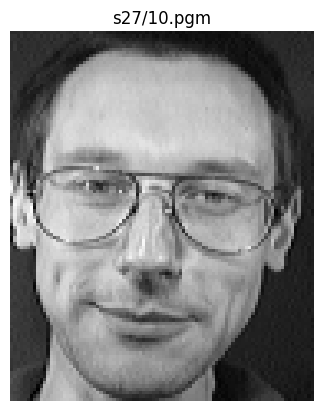

In [ ]:
# ONE-SHOT DATASET CHECK & PREVIEW
from google.colab import drive
import os, glob, random, matplotlib.pyplot as plt
from PIL import Image

# 1. Mount Google Drive
drive.mount('/content/drive')              # follow the link → copy auth code → paste

# 2. Path to your dataset (edit if it lives elsewhere)
FACE_ROOT = '/content/drive/MyDrive/faces_dataset'

# 3. Verify we have 40 folders and 10 images per folder
subjects = sorted([d for d in os.listdir(FACE_ROOT) if d.startswith('s')])
assert len(subjects) == 40, f'Expected 40 subject folders, found {len(subjects)}.'
for s in subjects:
    n_imgs = len(glob.glob(f'{FACE_ROOT}/{s}/*.pgm'))
    if n_imgs != 10:
        raise ValueError(f'{s} has {n_imgs} images (expected 10).')
print('Dataset structure looks OK.')

# 4. Show one random picture
subj = random.choice(subjects)
img_path = random.choice(glob.glob(f'{FACE_ROOT}/{subj}/*.pgm'))
img = Image.open(img_path)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(img_path.replace(FACE_ROOT + '/', ''))
plt.show()


You'll be asked 3 questions per subject: gender (m/f), hair long? (y/n), facial hair? (y/n)



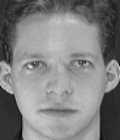

s1  gender m/f : m
s1  hair long y/n : n
s1  facial hair y/n : n
-------------------------


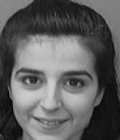

s10  gender m/f : f
s10  hair long y/n : y
s10  facial hair y/n : n
-------------------------


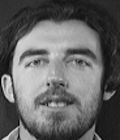

s11  gender m/f : m
s11  hair long y/n : n
s11  facial hair y/n : y
-------------------------


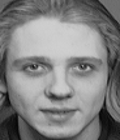

s12  gender m/f : m
s12  hair long y/n : y
s12  facial hair y/n : n
-------------------------


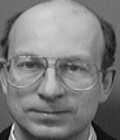

s13  gender m/f : m
s13  hair long y/n : n
s13  facial hair y/n : n
-------------------------


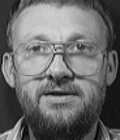

s14  gender m/f : m
s14  hair long y/n : n
s14  facial hair y/n : y
-------------------------


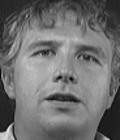

s15  gender m/f : m
s15  hair long y/n : y
s15  facial hair y/n : n
-------------------------


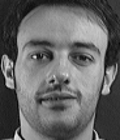

s16  gender m/f : m
s16  hair long y/n : n
s16  facial hair y/n : y
-------------------------


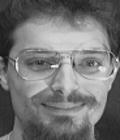

s17  gender m/f : m
s17  hair long y/n : n
s17  facial hair y/n : y
-------------------------


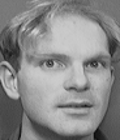

s18  gender m/f : m
s18  hair long y/n : y
s18  facial hair y/n : n
-------------------------


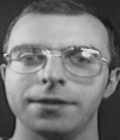

s19  gender m/f : m
s19  hair long y/n : n
s19  facial hair y/n : n
-------------------------


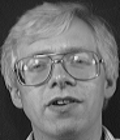

s2  gender m/f : m
s2  hair long y/n : y
s2  facial hair y/n : n
-------------------------


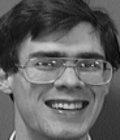

s20  gender m/f : m
s20  hair long y/n : y
s20  facial hair y/n : n
-------------------------


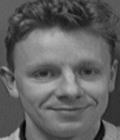

s21  gender m/f : m
s21  hair long y/n : n
s21  facial hair y/n : n
-------------------------


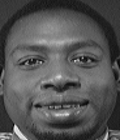

s22  gender m/f : m
s22  hair long y/n : y
s22  facial hair y/n : n
-------------------------


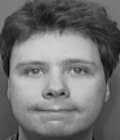

s23  gender m/f : m
s23  hair long y/n : y
s23  facial hair y/n : n
-------------------------


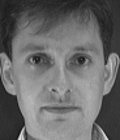

s24  gender m/f : m
s24  hair long y/n : y
s24  facial hair y/n : n
-------------------------


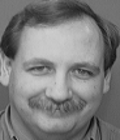

s25  gender m/f : m
s25  hair long y/n : n
s25  facial hair y/n : y
-------------------------


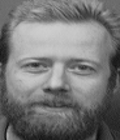

s26  gender m/f : m
s26  hair long y/n : n
s26  facial hair y/n : y
-------------------------


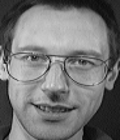

s27  gender m/f : m
s27  hair long y/n : n
s27  facial hair y/n : n
-------------------------


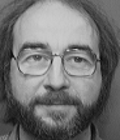

s28  gender m/f : m
s28  hair long y/n : n
s28  facial hair y/n : y
-------------------------


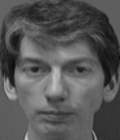

s29  gender m/f : m
s29  hair long y/n : y
s29  facial hair y/n : n
-------------------------


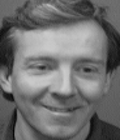

s3  gender m/f : m
s3  hair long y/n : n
s3  facial hair y/n : n
-------------------------


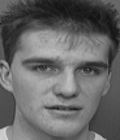

s30  gender m/f : m
s30  hair long y/n : n
s30  facial hair y/n : n
-------------------------


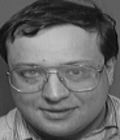

s31  gender m/f : m
s31  hair long y/n : n
s31  facial hair y/n : n
-------------------------


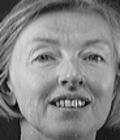

s32  gender m/f : f
s32  hair long y/n : n
s32  facial hair y/n : n
-------------------------


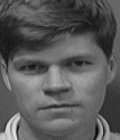

s33  gender m/f : m
s33  hair long y/n : y
s33  facial hair y/n : n
-------------------------


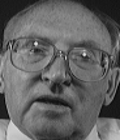

s34  gender m/f : m
s34  hair long y/n : n
s34  facial hair y/n : n
-------------------------


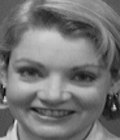

s35  gender m/f : f
s35  hair long y/n : n
s35  facial hair y/n : n
-------------------------


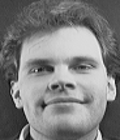

s36  gender m/f : m
s36  hair long y/n : n
s36  facial hair y/n : n
-------------------------


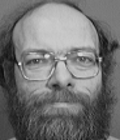

s37  gender m/f : m
s37  hair long y/n : n
s37  facial hair y/n : y
-------------------------


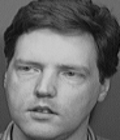

s38  gender m/f : m
s38  hair long y/n : n
s38  facial hair y/n : n
-------------------------


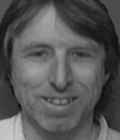

s39  gender m/f : m
s39  hair long y/n : y
s39  facial hair y/n : n
-------------------------


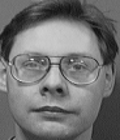

s4  gender m/f : m
s4  hair long y/n : n
s4  facial hair y/n : n
-------------------------


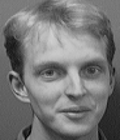

s40  gender m/f : m
s40  hair long y/n : n
s40  facial hair y/n : n
-------------------------


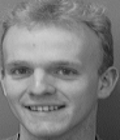

s5  gender m/f : m
s5  hair long y/n : n
s5  facial hair y/n : n
-------------------------


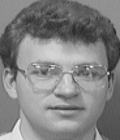

s6  gender m/f : m
s6  hair long y/n : n
s6  facial hair y/n : n
-------------------------


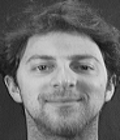

s7  gender m/f : m
s7  hair long y/n : y
s7  facial hair y/n : y
-------------------------


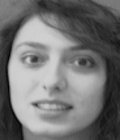

s8  gender m/f : f
s8  hair long y/n : y
s8  facial hair y/n : n
-------------------------


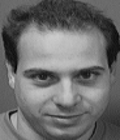

s9  gender m/f : m
s9  hair long y/n : n
s9  facial hair y/n : n
-------------------------

Saved template to /content/drive/MyDrive/subject_labels.csv


In [ ]:
# FOLDER-LEVEL LABELLING ⟶ subject_labels.csv
import os, glob, csv, pathlib
from PIL import Image
import pandas as pd
from google.colab import output, widgets

FACE_ROOT = '/content/drive/MyDrive/faces_dataset'      # keep as set earlier
CSV_PATH  = '/content/drive/MyDrive/subject_labels.csv' # will be created / overwritten

subjects = sorted(d for d in os.listdir(FACE_ROOT) if d.startswith('s'))

records = []
print("You'll be asked 3 questions per subject: "
      "gender (m/f), hair long? (y/n), facial hair? (y/n)\n")

for s in subjects:
    # --- quick 1-image preview for context -------------------
    img_path = sorted(glob.glob(f'{FACE_ROOT}/{s}/*.pgm'))[0]
    display(Image.open(img_path).resize((120,140)))
    # ---------------------------------------------------------

    g = input(f'{s}  gender m/f : ').strip().lower()
    h = input(f'{s}  hair long y/n : ').strip().lower()
    f = input(f'{s}  facial hair y/n : ').strip().lower()
    print('-'*25)

    records.append(dict(folder=s,
                        gender = 1 if g=='m' else 0,
                        hair_long = 1 if h=='y' else 0,
                        facial_hair = 1 if f=='y' else 0))

# save CSV
pd.DataFrame(records).to_csv(CSV_PATH, index=False)
print(f'\nSaved template to {CSV_PATH}')


In [ ]:
# FULL UPDATE: glasses  +  smile  +  pose_turned
# ---------------------------------------------------------------
!pip install -q mediapipe==0.10.9 pandas tqdm

import cv2, mediapipe as mp, glob, os, numpy as np, pandas as pd
from tqdm.auto import tqdm
from google.colab import drive

# ── paths ───────────────────────────────────────────────────────────────
drive.mount('/content/drive')

ROOT     = '/content/drive/MyDrive/faces_dataset'    # s1 … s40
CSV_PATH = '/content/drive/MyDrive/image_labels.csv' # master table

# ── 1.  HARD-CODED “with-glasses” image list ─────────────────────────────
folder_all_glasses = ['s2','s6','s14','s27','s28','s31','s34','s37']
folder_part_glasses = {
    's4' : [1,2,3,8,9],
    's7' : [1,2,3,4,6,10],
    's13': [1,2,5,6,7,8,9,10],
    's17': [1,2,5,6,7,8,9,10],
    's19': [1,2,3,6,10],
    's20': [1,2,3,5,7,8,9,10],
}

glasses_set = []
for f in folder_all_glasses:
    glasses_set += [f'{f}/{i}.pgm' for i in range(1,11)]
for f, nums in folder_part_glasses.items():
    glasses_set += [f'{f}/{i}.pgm' for i in nums]
glasses_set = set(glasses_set)                            # 117 paths

# ── 2.  HARD-CODED “smile” image list ───────────────────────────────────
smile_map = {
    's3' : 'all',
    's5' : 'all',
    's6' : [2],
    's7' : [1,2,3,4,6,10],
    's8' : [3,6],
    's10': [1,2,3,4],
    's12': [2,4,5,7,10],
    's19': [7,8,9],
    's20': [1,2,3],
    's22': [5,7,8,10],
    's27': [2,4],
    's31': [4],
    's32': [1,2],
    's33': [3,4,5,6,7,8,9],
    's35': [1,2,3,4,5,9,10],
    's37': [2],
    's39': 'all',
    's40': [1,2,3,4,5,7,8],
}
smile_set = []
for f,pics in smile_map.items():
    if pics == 'all':
        smile_set += [f'{f}/{i}.pgm' for i in range(1,11)]
    else:
        smile_set += [f'{f}/{i}.pgm' for i in pics]
smile_set = set(smile_set)                                # 117 paths

# ── 3.  Pose detector (yaw via MediaPipe) ───────────────────────────────
mp_face = mp.solutions.face_mesh.FaceMesh(
            static_image_mode=True, refine_landmarks=True,
            max_num_faces=1, min_detection_confidence=0.5)

def pose_flag(img_bgr, thresh=0.12):          # ~±7°
    h,w = img_bgr.shape[:2]
    res = mp_face.process(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    if not res.multi_face_landmarks:
        return -1
    nose_x = res.multi_face_landmarks[0].landmark[1].x
    yaw = (nose_x - 0.5)*2                    # −1…1
    return int(abs(yaw) > thresh)

# ── 4.  Load CSV, overwrite all three columns ───────────────────────────
df = pd.read_csv(CSV_PATH)

# glasses
df['glasses'] = df.image.str.replace(ROOT+'/','').isin(glasses_set).astype(int)

# smile
df['smile']   = df.image.str.replace(ROOT+'/','').isin(smile_set).astype(int)

# pose_turned
pose_vals = []
for p in tqdm(df.image, desc='pose'):
    pose_vals.append(pose_flag(cv2.imread(p)))
df['pose_turned'] = pose_vals

# ── 5.  Save & show counts ──────────────────────────────────────────────
df.to_csv(CSV_PATH, index=False)

print('\nLabel counts:')
print('glasses      →', df.glasses.value_counts().to_dict())
print('smile        →', df.smile.value_counts().to_dict())
print('pose_turned  →', df.pose_turned.value_counts().to_dict())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 10.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
Mounted at /content/drive


pose:   0%|          | 0/400 [00:00<?, ?it/s]


Label counts:
glasses      → {0: 280, 1: 120}
smile        → {0: 315, 1: 85}
pose_turned  → {0: 218, 1: 182}


In [ ]:
# 80 / 20 “WITHIN-FOLDER”  SPLIT  (8 pics train, 2 pics eval)
!pip install -q pandas

import pandas as pd, re
from google.colab import drive

# ── paths ───────────────────────────────────────────────────────────────
drive.mount('/content/drive')

MASTER_CSV = '/content/drive/MyDrive/image_labels.csv'          # 400 × labels
OUT_CSV    = '/content/drive/MyDrive/split_manifest_intra.csv'   # new file

# ── load master label table ─────────────────────────────────────────────
df = pd.read_csv(MASTER_CSV)

# helper: extract picture index (1-10) from ".../s14/7.pgm"
picnum = df.image.str.extract(r'/(\d+)\.pgm$', expand=False).astype(int)

df['split'] = 'train'                  # default
df.loc[picnum > 8, 'split'] = 'eval'   # images 9 & 10

# sanity check
train_ct = df.split.value_counts().to_dict()
print('images per split →', train_ct)  # should be {'train':320, 'eval':80}

# save
df.to_csv(OUT_CSV, index=False)
print('saved new manifest →', OUT_CSV)
print('example rows:')
display(df.head(12))


Mounted at /content/drive
images per split → {'train': 320, 'eval': 80}
saved new manifest → /content/drive/MyDrive/split_manifest_intra.csv
example rows:


image folder  gender  hair_long  \
0     /content/drive/MyDrive/faces_dataset/s1/1.pgm     s1       1          0   
1    /content/drive/MyDrive/faces_dataset/s1/10.pgm     s1       1          0   
2     /content/drive/MyDrive/faces_dataset/s1/2.pgm     s1       1          0   
3     /content/drive/MyDrive/faces_dataset/s1/3.pgm     s1       1          0   
4     /content/drive/MyDrive/faces_dataset/s1/4.pgm     s1       1          0   
5     /content/drive/MyDrive/faces_dataset/s1/5.pgm     s1       1          0   
6     /content/drive/MyDrive/faces_dataset/s1/6.pgm     s1       1          0   
7     /content/drive/MyDrive/faces_dataset/s1/7.pgm     s1       1          0   
8     /content/drive/MyDrive/faces_dataset/s1/8.pgm     s1       1          0   
9     /content/drive/MyDrive/faces_dataset/s1/9.pgm     s1       1          0   
10   /content/drive/MyDrive/faces_dataset/s10/1.pgm    s10       0          1   
11  /content/drive/MyDrive/faces_dataset/s10/10.pgm    s10       0          1   

    facial_hair  pose_turned  smile  glasses  split  
0             0            0      0        0  train  
1             0            1      0        0   eval  
2             0            1      0        0  train  
3             0            0      0        0  train  
4             0            1      0        0  train  
5             0            1      0        0  train  
6             0            1      0        0  train  
7             0            0      0        0  train  
8             0            0      0        0  train  
9             0            1      0        0   eval  
10            0            1      1        0  train  
11            0            0      0        0   eval

In [ ]:
# FLDA for EVERY attribute in one go
!pip install -q pandas tqdm scikit-learn

import numpy as np, pandas as pd, cv2, os
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
from google.colab import drive

drive.mount('/content/drive')

ROOT = '/content/drive/MyDrive/faces_dataset'
CSV  = '/content/drive/MyDrive/split_manifest.csv'

LABELS = ['gender', 'hair_long', 'facial_hair',
          'glasses', 'smile', 'pose_turned']      # all your columns

# helper functions
def full(p): return p if os.path.isabs(p) else os.path.join(ROOT, p)
def vec(p):
    img = cv2.imread(full(p), cv2.IMREAD_GRAYSCALE)
    if img is None: raise FileNotFoundError(full(p))
    return img.flatten().astype(np.float32)/255.0

df  = pd.read_csv(CSV)
X   = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train = df.split == 'train'
test  = df.split == 'eval'

results = {}
for lab in LABELS:
    y = df[lab].values.astype(int)

    # means
    mu0 = X[train & (y==0)].mean(axis=0, keepdims=True)
    mu1 = X[train & (y==1)].mean(axis=0, keepdims=True)

    # within-class scatter
    XC0 = X[train & (y==0)] - mu0
    XC1 = X[train & (y==1)] - mu1
    Sintra = XC0.T @ XC0 + XC1.T @ XC1
    w = np.linalg.inv(Sintra + 1e-4*np.eye(Sintra.shape[0])) @ (mu1-mu0).T
    w = w.flatten()
    b = w @ ((mu1+mu0)/2).flatten()

    y_pred = (X[test] @ w - b > 0).astype(int)
    results[lab] = accuracy_score(y[test], y_pred)*100

# pretty print
print('\nFLDA (manual) accuracies')
for k,v in results.items():
    print(f'{k:12s}: {v:5.2f} %')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


vecs:   0%|          | 0/400 [00:00<?, ?it/s]


FLDA (manual) accuracies
gender      : 37.50 %
hair_long   : 65.00 %
facial_hair : 50.00 %
glasses     : 47.50 %
smile       : 53.75 %
pose_turned : 86.25 %


In [ ]:
# FLDA on the 80/20   "within-folder"   split
!pip install -q pandas tqdm scikit-learn

import numpy as np, pandas as pd, cv2, os
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
from google.colab import drive

drive.mount('/content/drive')

ROOT = '/content/drive/MyDrive/faces_dataset'
CSV  = '/content/drive/MyDrive/split_manifest_intra.csv'   # ← NEW manifest

LABELS = ['gender', 'hair_long', 'facial_hair',
          'glasses', 'smile', 'pose_turned']

# helper: read image → vector
def full(p): return p if os.path.isabs(p) else os.path.join(ROOT, p)
def vec(p):
    img = cv2.imread(full(p), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(full(p))
    return img.flatten().astype(np.float32)/255.0

df   = pd.read_csv(CSV)
X    = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train = df.split == 'train'          # 8 pics per folder
test  = df.split == 'eval'           # 2 pics per folder

results = {}
for lab in LABELS:
    y = df[lab].values.astype(int)

    # means
    mu0 = X[train & (y==0)].mean(axis=0, keepdims=True)
    mu1 = X[train & (y==1)].mean(axis=0, keepdims=True)

    # within-class scatter
    XC0 = X[train & (y==0)] - mu0
    XC1 = X[train & (y==1)] - mu1
    Sintra = XC0.T @ XC0 + XC1.T @ XC1
    w = np.linalg.inv(Sintra + 1e-4*np.eye(Sintra.shape[0])) @ (mu1-mu0).T
    w = w.flatten()
    b = w @ ((mu1 + mu0)/2).flatten()

    y_pred = (X[test] @ w - b > 0).astype(int)
    results[lab] = accuracy_score(y[test], y_pred)*100

# results table
print('\nFLDA (manual) accuracies  —  80/20 same-subject split')
for k,v in results.items():
    print(f'{k:12s}: {v:5.2f} %')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


vecs:   0%|          | 0/400 [00:00<?, ?it/s]


FLDA (manual) accuracies  —  80/20 same-subject split
gender      : 76.25 %
hair_long   : 88.75 %
facial_hair : 72.50 %
glasses     : 87.50 %
smile       : 61.25 %
pose_turned : 47.50 %


In [ ]:
# PCA (Eigenfaces) classifier for every attribute
# ----------------------------------------------
!pip install -q pandas tqdm scikit-learn

import numpy as np, pandas as pd, cv2, os
from tqdm.auto import tqdm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from google.colab import drive

drive.mount('/content/drive')

ROOT = '/content/drive/MyDrive/faces_dataset'

CSV = '/content/drive/MyDrive/split_manifest.csv'       # ← person-independent

LABELS = ['gender', 'hair_long', 'facial_hair',
          'glasses', 'smile', 'pose_turned']

# helper: load image → 1-D vector
def full(p): return p if os.path.isabs(p) else os.path.join(ROOT, p)
def vec(p):
    img = cv2.imread(full(p), cv2.IMREAD_GRAYSCALE)
    if img is None: raise FileNotFoundError(full(p))
    return img.flatten().astype(np.float32) / 255.0

df   = pd.read_csv(CSV)
X    = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train = df.split == 'train'
test  = df.split == 'eval'

# fit PCA only once (unsupervised)
pca = PCA(n_components=0.95, svd_solver='full')        # keep 95 % variance
Xp_train = pca.fit_transform(X[train])
Xp_test  = pca.transform(X[test])

results = {}
for lab in LABELS:
    y = df[lab].values.astype(int)

    m0 = Xp_train[y[train]==0].mean(axis=0)
    m1 = Xp_train[y[train]==1].mean(axis=0)

    d0 = np.linalg.norm(Xp_test - m0, axis=1)
    d1 = np.linalg.norm(Xp_test - m1, axis=1)
    y_pred = (d1 < d0).astype(int)

    results[lab] = accuracy_score(y[test], y_pred)*100

print('\nPCA (Eigenfaces) accuracies ')
for k,v in results.items():
    print(f'{k:12s}: {v:5.2f} %')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


vecs:   0%|          | 0/400 [00:00<?, ?it/s]


PCA (Eigenfaces) accuracies 
gender      : 72.50 %
hair_long   : 87.50 %
facial_hair : 35.00 %
glasses     : 73.75 %
smile       : 67.50 %
pose_turned : 70.00 %


In [ ]:
# PCA (Eigenfaces) classifier for every attribute
# ----------------------------------------------
!pip install -q pandas tqdm scikit-learn

import numpy as np, pandas as pd, cv2, os
from tqdm.auto import tqdm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from google.colab import drive

drive.mount('/content/drive')

ROOT = '/content/drive/MyDrive/faces_dataset'
CSV  = '/content/drive/MyDrive/split_manifest_intra.csv'   # 80/20 same-subject
# CSV = '/content/drive/MyDrive/split_manifest.csv'       # ← person-independent

LABELS = ['gender', 'hair_long', 'facial_hair',
          'glasses', 'smile', 'pose_turned']

# helper: load image → 1-D vector
def full(p): return p if os.path.isabs(p) else os.path.join(ROOT, p)
def vec(p):
    img = cv2.imread(full(p), cv2.IMREAD_GRAYSCALE)
    if img is None: raise FileNotFoundError(full(p))
    return img.flatten().astype(np.float32) / 255.0

df   = pd.read_csv(CSV)
X    = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train = df.split == 'train'
test  = df.split == 'eval'

# fit PCA only once (unsupervised)
pca = PCA(n_components=0.95, svd_solver='full')        # keep 95 % variance
Xp_train = pca.fit_transform(X[train])
Xp_test  = pca.transform(X[test])

results = {}
for lab in LABELS:
    y = df[lab].values.astype(int)

    m0 = Xp_train[y[train]==0].mean(axis=0)
    m1 = Xp_train[y[train]==1].mean(axis=0)

    d0 = np.linalg.norm(Xp_test - m0, axis=1)
    d1 = np.linalg.norm(Xp_test - m1, axis=1)
    y_pred = (d1 < d0).astype(int)

    results[lab] = accuracy_score(y[test], y_pred)*100

print('\nPCA (Eigenfaces) accuracies   –  80/20 same-subject split')
for k,v in results.items():
    print(f'{k:12s}: {v:5.2f} %')


Mounted at /content/drive


vecs:   0%|          | 0/400 [00:00<?, ?it/s]


PCA (Eigenfaces) accuracies   –  80/20 same-subject split
gender      : 83.75 %
hair_long   : 73.75 %
facial_hair : 67.50 %
glasses     : 75.00 %
smile       : 65.00 %
pose_turned : 73.75 %


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


vecs:   0%|          | 0/400 [00:00<?, ?it/s]

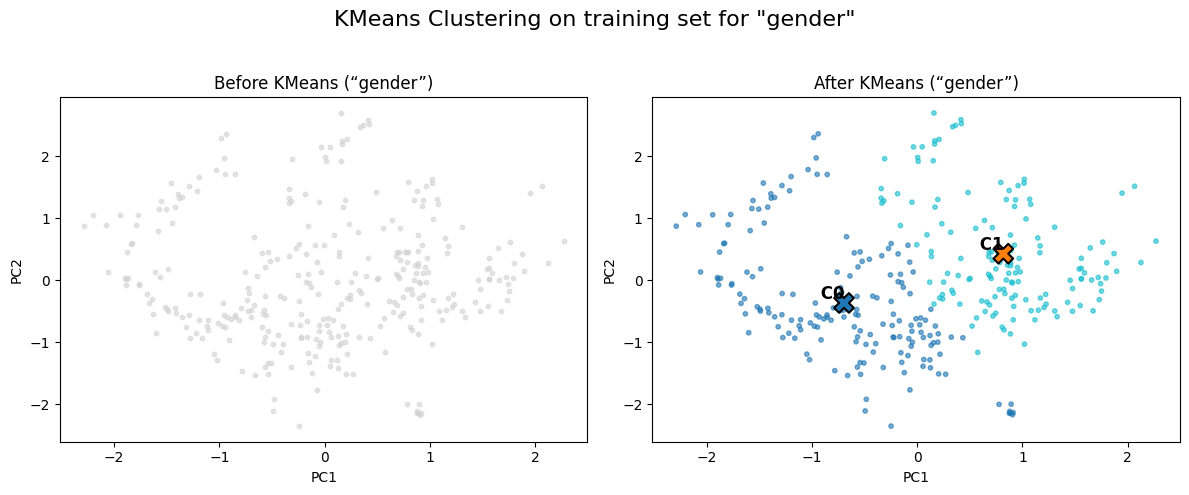

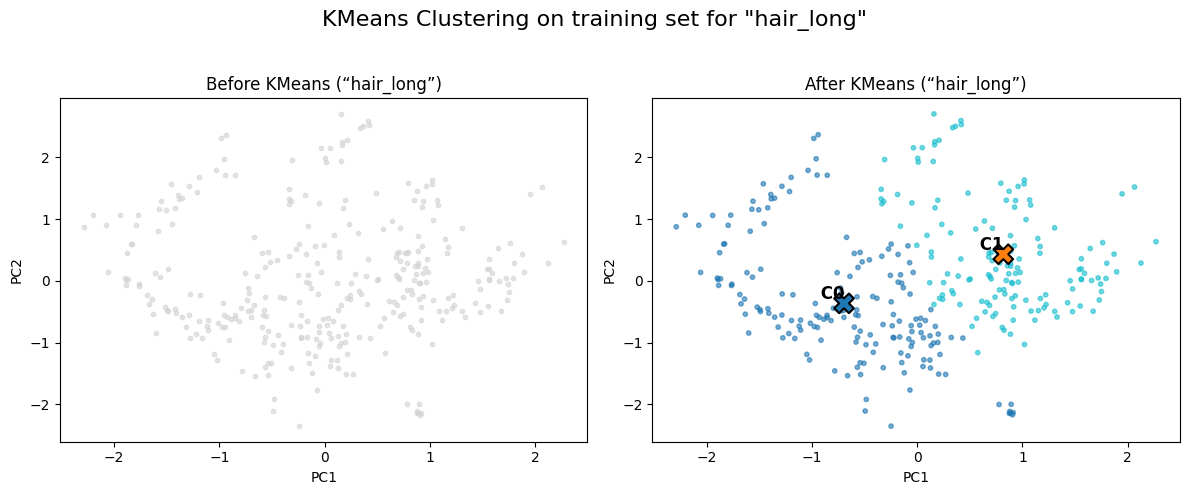

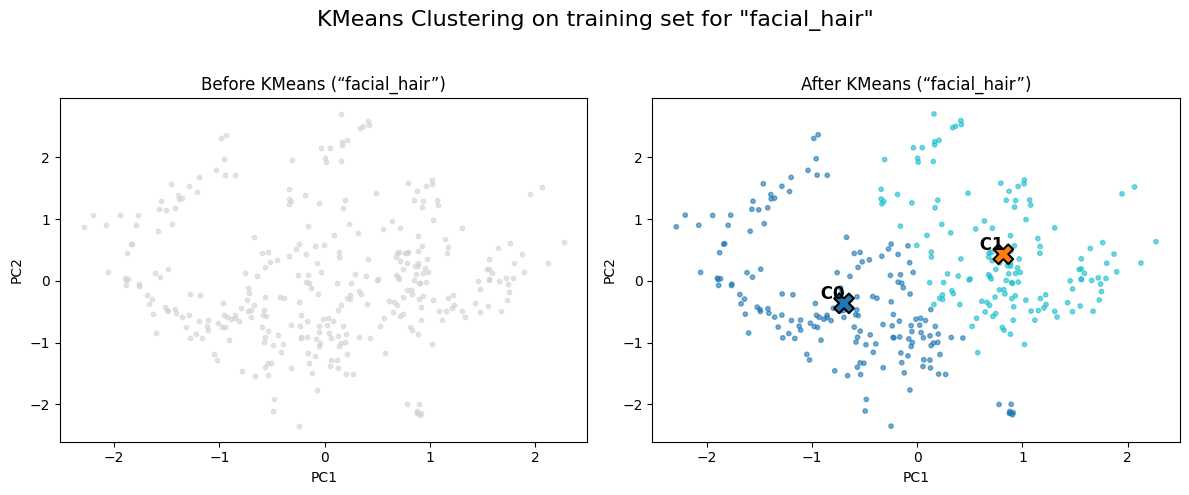

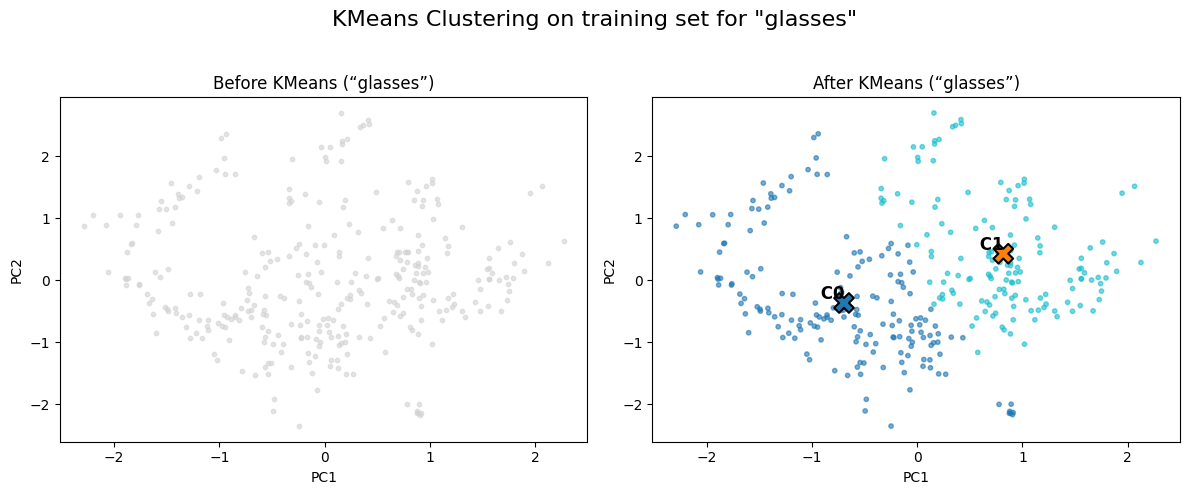

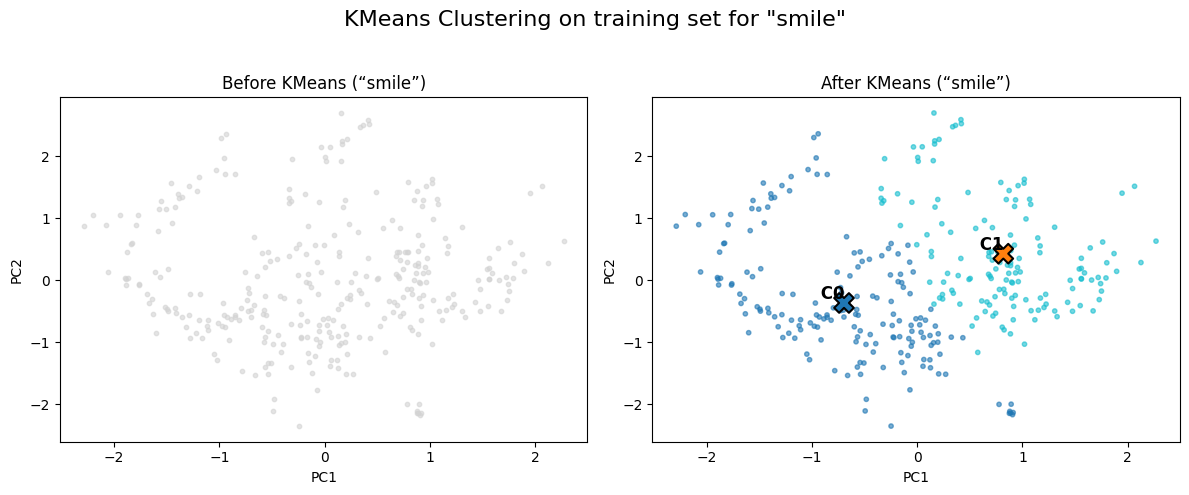

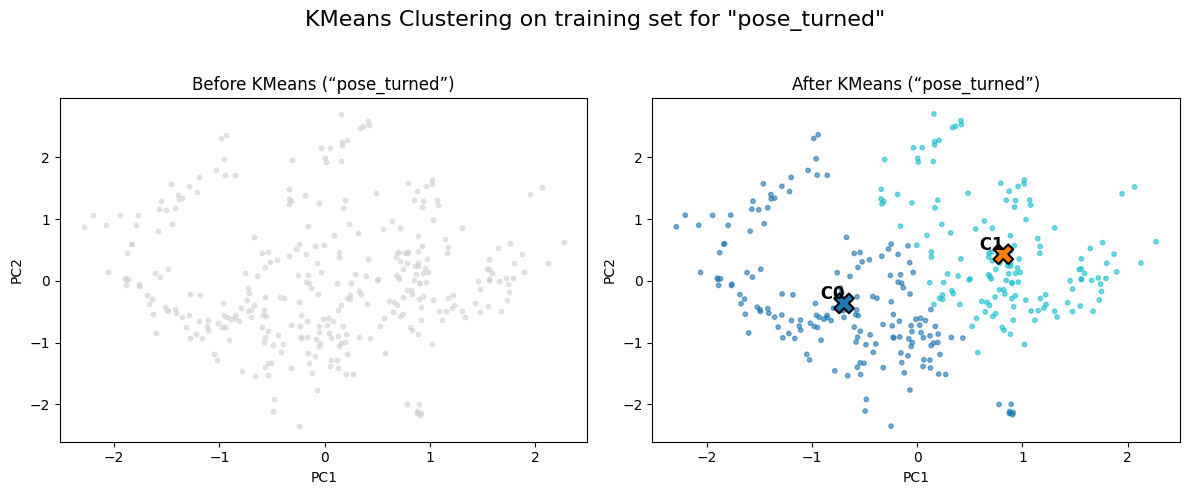


k-means accuracies  
gender      : 75.00 %
hair_long   : 75.00 %
facial_hair : 87.50 %
glasses     : 58.75 %
smile       : 72.50 %
pose_turned : 43.75 %


In [2]:
# k-MEANS (unsupervised) for every attribute, with cluster scatter + centroids
# ---------------------------------------------------------------------------
!pip install -q pandas tqdm scikit-learn opencv-python-headless matplotlib

import numpy as np
import pandas as pd
import cv2
import os
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import drive

# 1) Mount Drive
drive.mount('/content/drive')

# 2) Paths and labels
ROOT   = '/content/drive/MyDrive/faces_dataset'
CSV = '/content/drive/MyDrive/split_manifest.csv'
LABELS = ['gender', 'hair_long', 'facial_hair', 'glasses', 'smile', 'pose_turned']

# 3) Helpers
def full(p):
    return p if os.path.isabs(p) else os.path.join(ROOT, p)

def vec(p):
    img = cv2.imread(full(p), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Cannot load image: {full(p)}")
    return img.flatten().astype(np.float32) / 255.0

# 4) Load data & flatten
df         = pd.read_csv(CSV)
X          = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train_mask = df.split == 'train'
test_mask  = df.split == 'eval'

# 5) Precompute a 2D projection for VIS (fit PCA on training once)
pca_vis    = PCA(n_components=2, whiten=True, random_state=0)
X2_train   = pca_vis.fit_transform(X[train_mask])

results = {}
for lab in LABELS:
    y = df[lab].values.astype(int)

    # 1. fit k-means on the original high-D train data
    km = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X[train_mask])

    # 2. majority-vote mapping & test accuracy
    train_labels = y[train_mask]
    clust_train  = km.labels_
    vote0 = train_labels[clust_train == 0].mean()
    vote1 = train_labels[clust_train == 1].mean()
    cluster_to_cls = {0: int(vote0 >= 0.5), 1: int(vote1 >= 0.5)}

    test_clust = km.predict(X[test_mask])
    y_pred     = np.vectorize(cluster_to_cls.get)(test_clust)
    results[lab] = accuracy_score(y[test_mask], y_pred) * 100

    # 3. VISUALIZE before vs after + centroids
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Before K-Means: light gray
    axes[0].scatter(
        X2_train[:,0], X2_train[:,1],
        c='lightgray', s=10, alpha=0.6
    )
    axes[0].set_title(f'Before KMeans (“{lab}”)')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')

    # After K-Means: colored by cluster
    axes[1].scatter(
        X2_train[:,0], X2_train[:,1],
        c=clust_train, cmap='tab10', s=10, alpha=0.6
    )
    # project centroids into the same 2D space
    cent2d = pca_vis.transform(km.cluster_centers_)
    axes[1].scatter(
        cent2d[:,0], cent2d[:,1],
        marker='X', s=200, edgecolor='k', linewidth=1.5,
        c=['tab:blue','tab:orange']
    )
    for i, (x, y2) in enumerate(cent2d):
        axes[1].text(
            x, y2, f' C{i}', fontsize=12,
            verticalalignment='bottom', horizontalalignment='right',
            color='k', weight='bold'
        )

    axes[1].set_title(f'After KMeans (“{lab}”)')
    axes[1].set_xlabel('PC1')
    axes[1].set_ylabel('PC2')

    plt.suptitle(f'KMeans Clustering on training set for "{lab}"', fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

# 6) Print accuracies
print('\nk-means accuracies  ')
for k, v in results.items():
    print(f'{k:12s}: {v:5.2f} %')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


vecs:   0%|          | 0/400 [00:00<?, ?it/s]

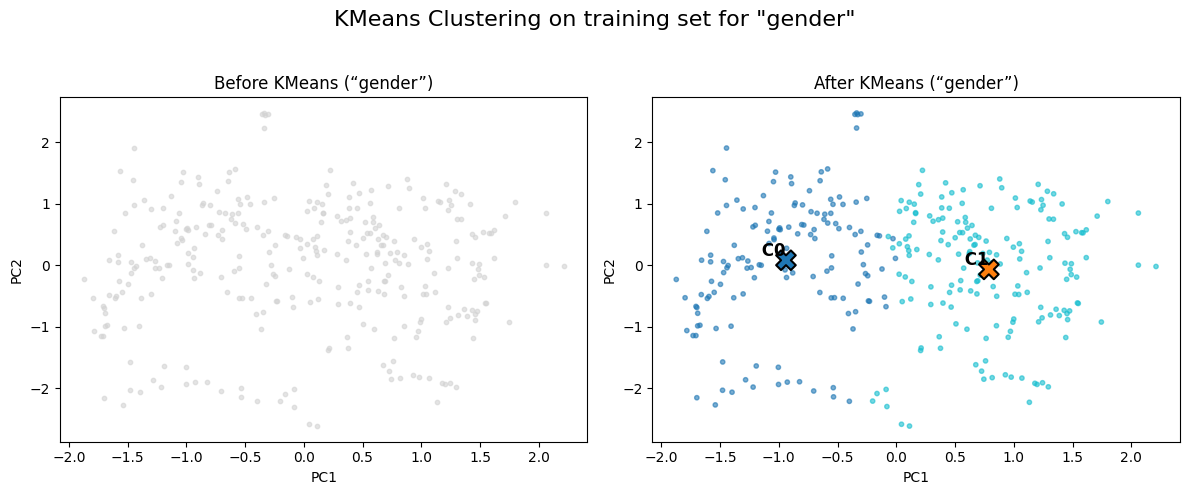

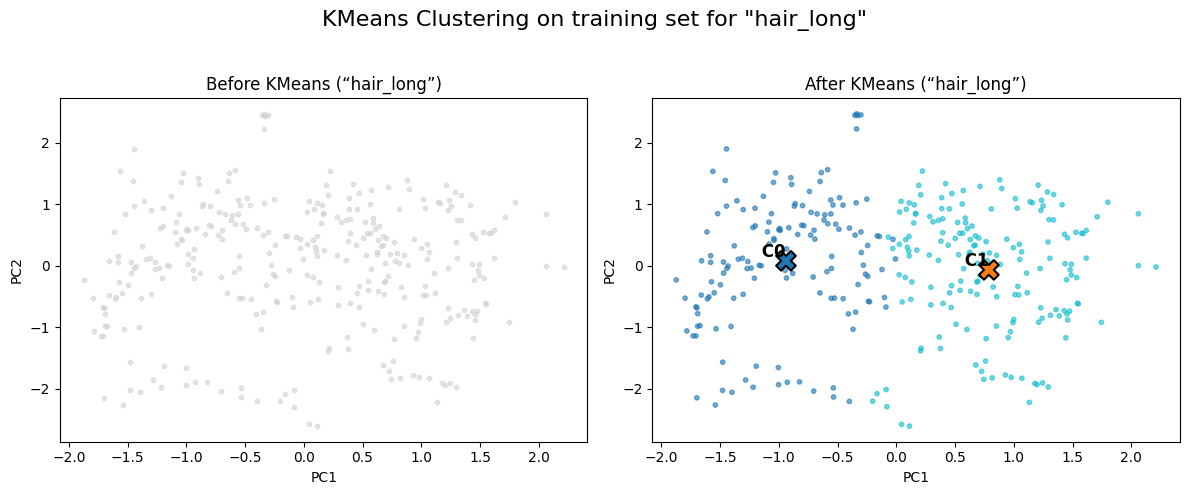

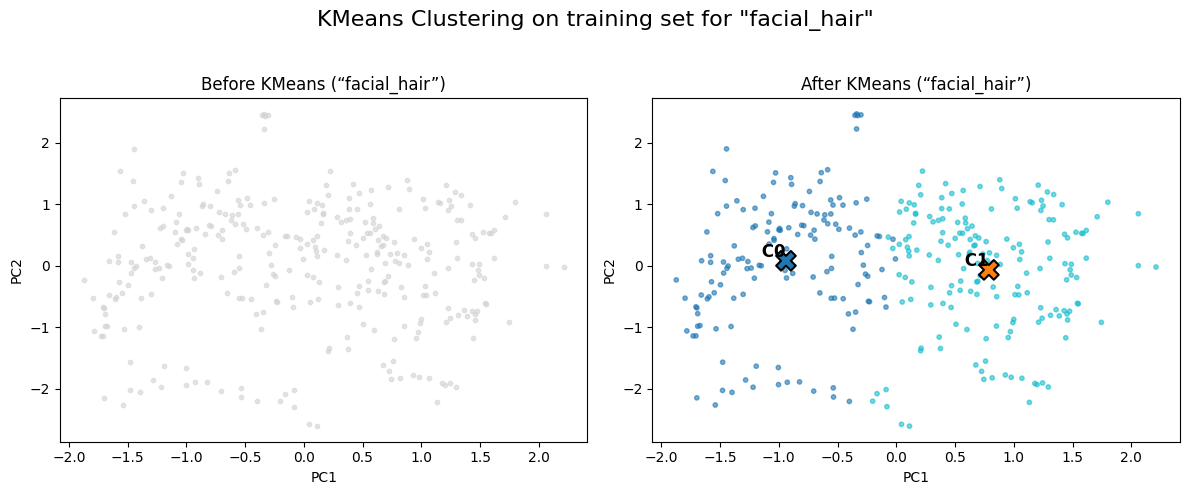

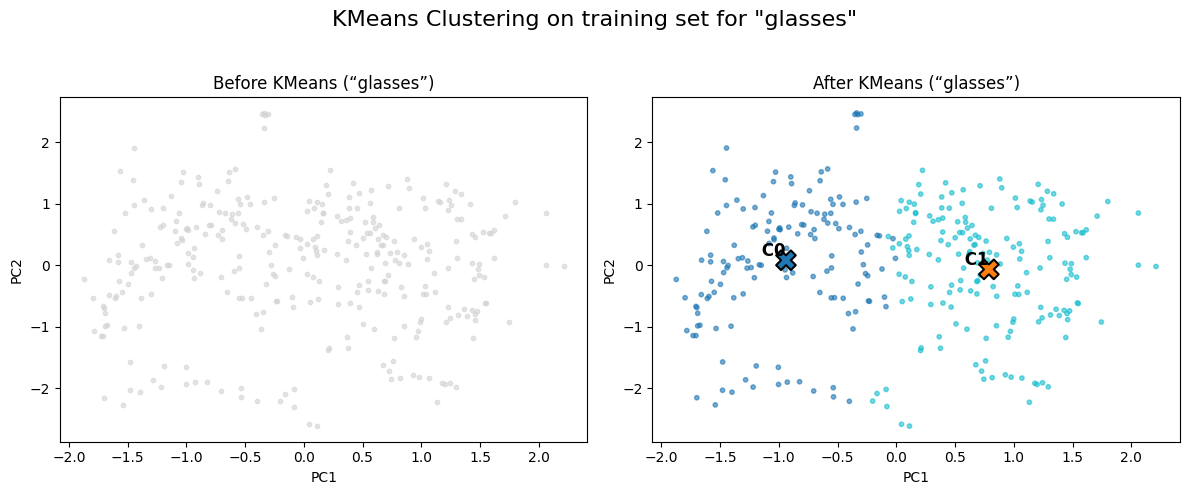

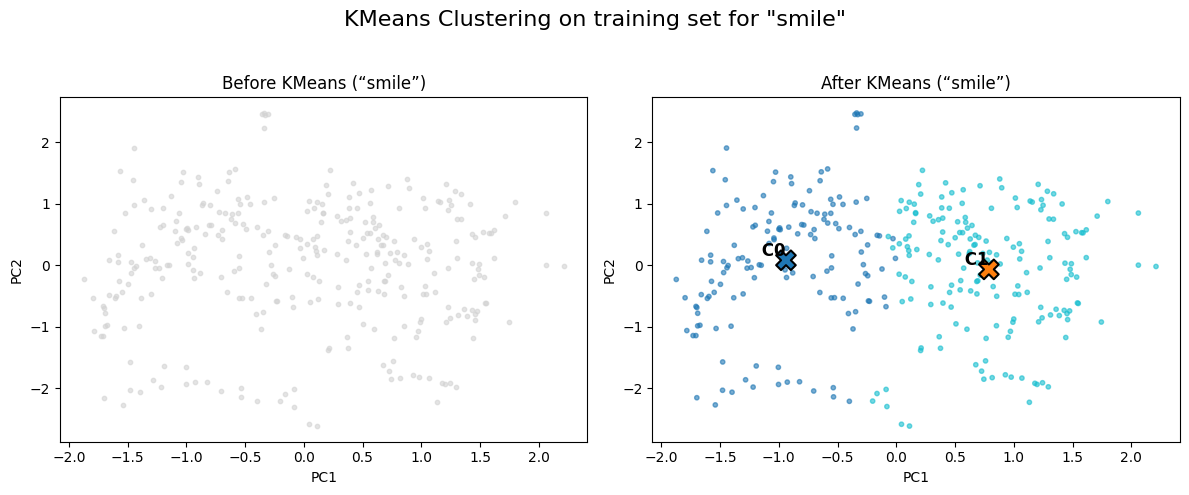

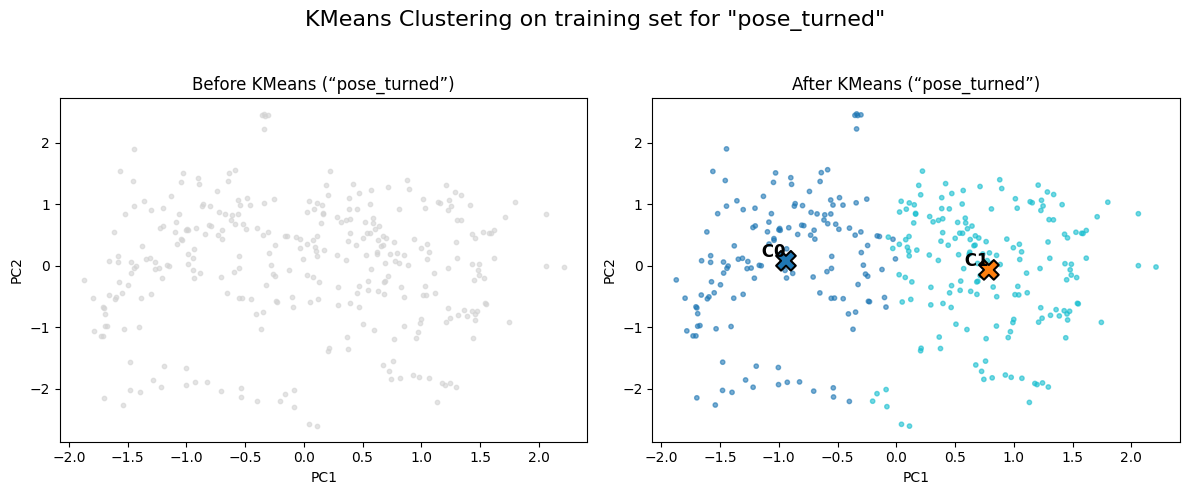


k-means accuracies   –  80/20 same-subject split

gender      : 90.00 %
hair_long   : 67.50 %
facial_hair : 77.50 %
glasses     : 68.75 %
smile       : 83.75 %
pose_turned : 52.50 %


In [ ]:
# k-MEANS (unsupervised) for every attribute, with cluster scatter + centroids
# ---------------------------------------------------------------------------
!pip install -q pandas tqdm scikit-learn opencv-python-headless matplotlib

import numpy as np
import pandas as pd
import cv2
import os
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import drive

# 1) Mount Drive
drive.mount('/content/drive')

# 2) Paths and labels
ROOT   = '/content/drive/MyDrive/faces_dataset'
CSV    = '/content/drive/MyDrive/split_manifest_intra.csv'  # 80/20 same-subject split
LABELS = ['gender', 'hair_long', 'facial_hair', 'glasses', 'smile', 'pose_turned']

# 3) Helpers
def full(p):
    return p if os.path.isabs(p) else os.path.join(ROOT, p)

def vec(p):
    img = cv2.imread(full(p), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Cannot load image: {full(p)}")
    return img.flatten().astype(np.float32) / 255.0

# 4) Load data & flatten
df         = pd.read_csv(CSV)
X          = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train_mask = df.split == 'train'
test_mask  = df.split == 'eval'

# 5) Precompute a 2D projection for VIS (fit PCA on training once)
pca_vis    = PCA(n_components=2, whiten=True, random_state=0)
X2_train   = pca_vis.fit_transform(X[train_mask])

results = {}
for lab in LABELS:
    y = df[lab].values.astype(int)

    # 1. fit k-means on the original high-D train data
    km = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X[train_mask])

    # 2. majority-vote mapping & test accuracy
    train_labels = y[train_mask]
    clust_train  = km.labels_
    vote0 = train_labels[clust_train == 0].mean()
    vote1 = train_labels[clust_train == 1].mean()
    cluster_to_cls = {0: int(vote0 >= 0.5), 1: int(vote1 >= 0.5)}

    test_clust = km.predict(X[test_mask])
    y_pred     = np.vectorize(cluster_to_cls.get)(test_clust)
    results[lab] = accuracy_score(y[test_mask], y_pred) * 100

    # 3. VISUALIZE before vs after + centroids
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Before K-Means: light gray
    axes[0].scatter(
        X2_train[:,0], X2_train[:,1],
        c='lightgray', s=10, alpha=0.6
    )
    axes[0].set_title(f'Before KMeans (“{lab}”)')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')

    # After K-Means: colored by cluster
    axes[1].scatter(
        X2_train[:,0], X2_train[:,1],
        c=clust_train, cmap='tab10', s=10, alpha=0.6
    )
    # project centroids into the same 2D space
    cent2d = pca_vis.transform(km.cluster_centers_)
    axes[1].scatter(
        cent2d[:,0], cent2d[:,1],
        marker='X', s=200, edgecolor='k', linewidth=1.5,
        c=['tab:blue','tab:orange']
    )
    for i, (x, y2) in enumerate(cent2d):
        axes[1].text(
            x, y2, f' C{i}', fontsize=12,
            verticalalignment='bottom', horizontalalignment='right',
            color='k', weight='bold'
        )

    axes[1].set_title(f'After KMeans (“{lab}”)')
    axes[1].set_xlabel('PC1')
    axes[1].set_ylabel('PC2')

    plt.suptitle(f'KMeans Clustering on training set for "{lab}"', fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

# 6) Print accuracies
print('\nk-means accuracies   –  80/20 same-subject split\n')
for k, v in results.items():
    print(f'{k:12s}: {v:5.2f} %')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


vecs:   0%|          | 0/400 [00:00<?, ?it/s]

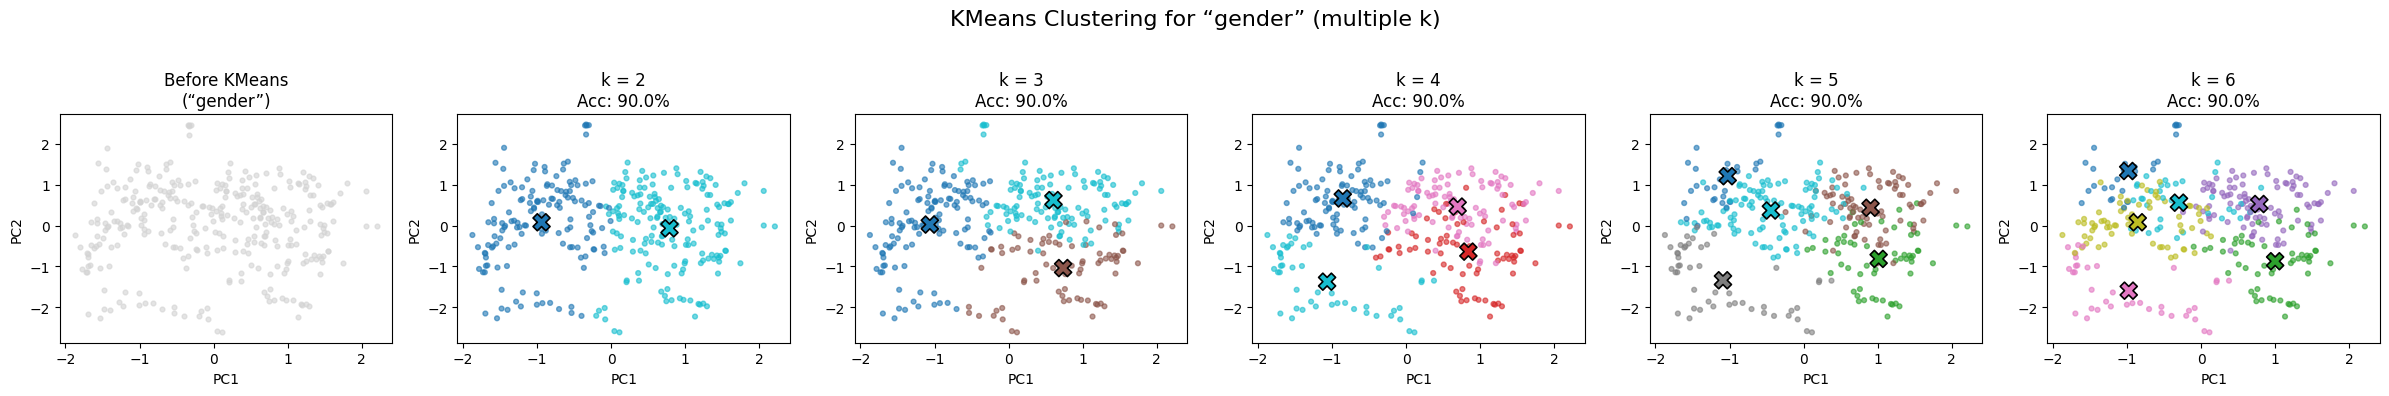

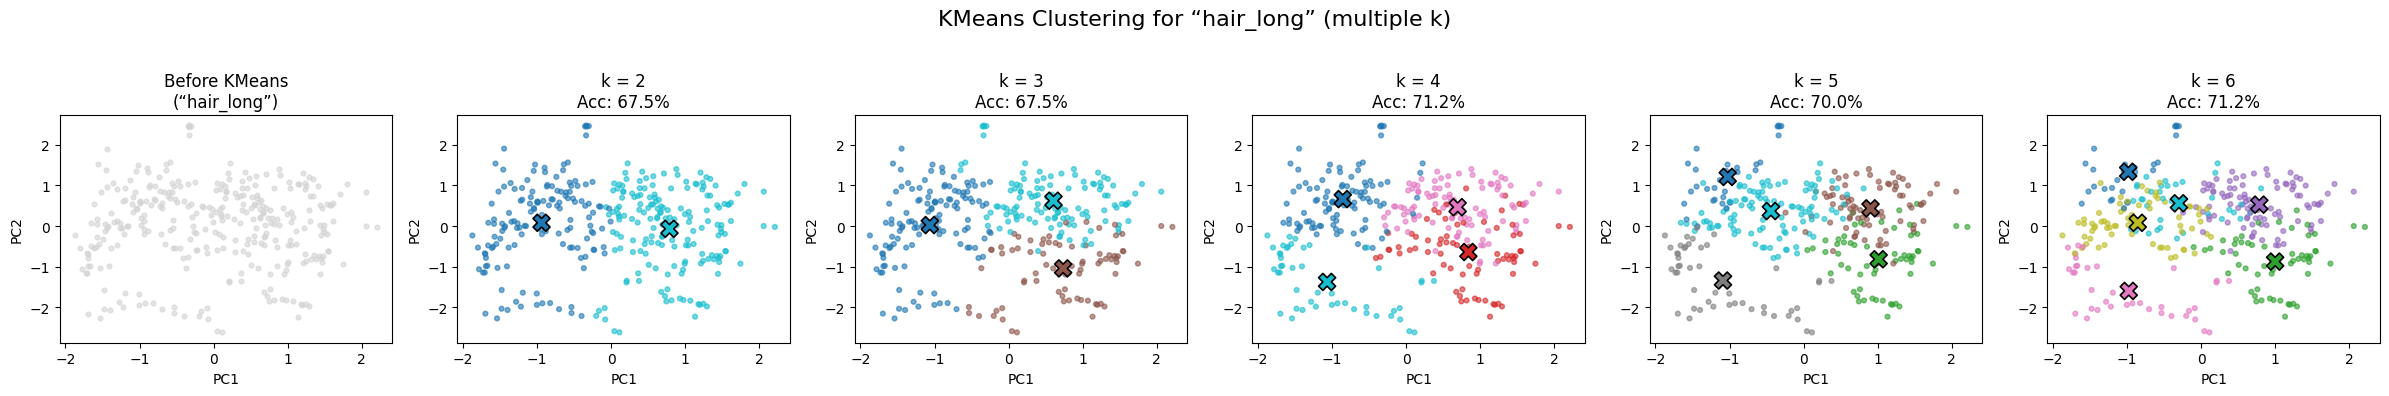

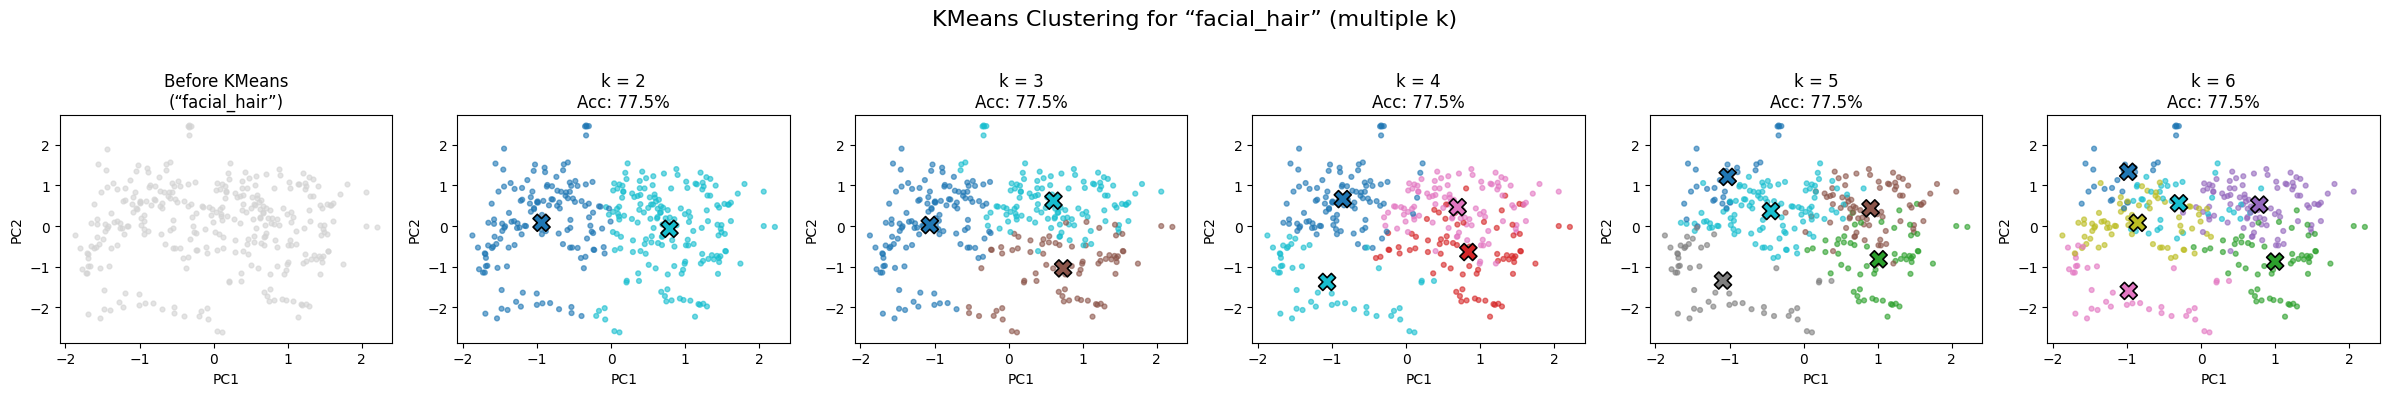

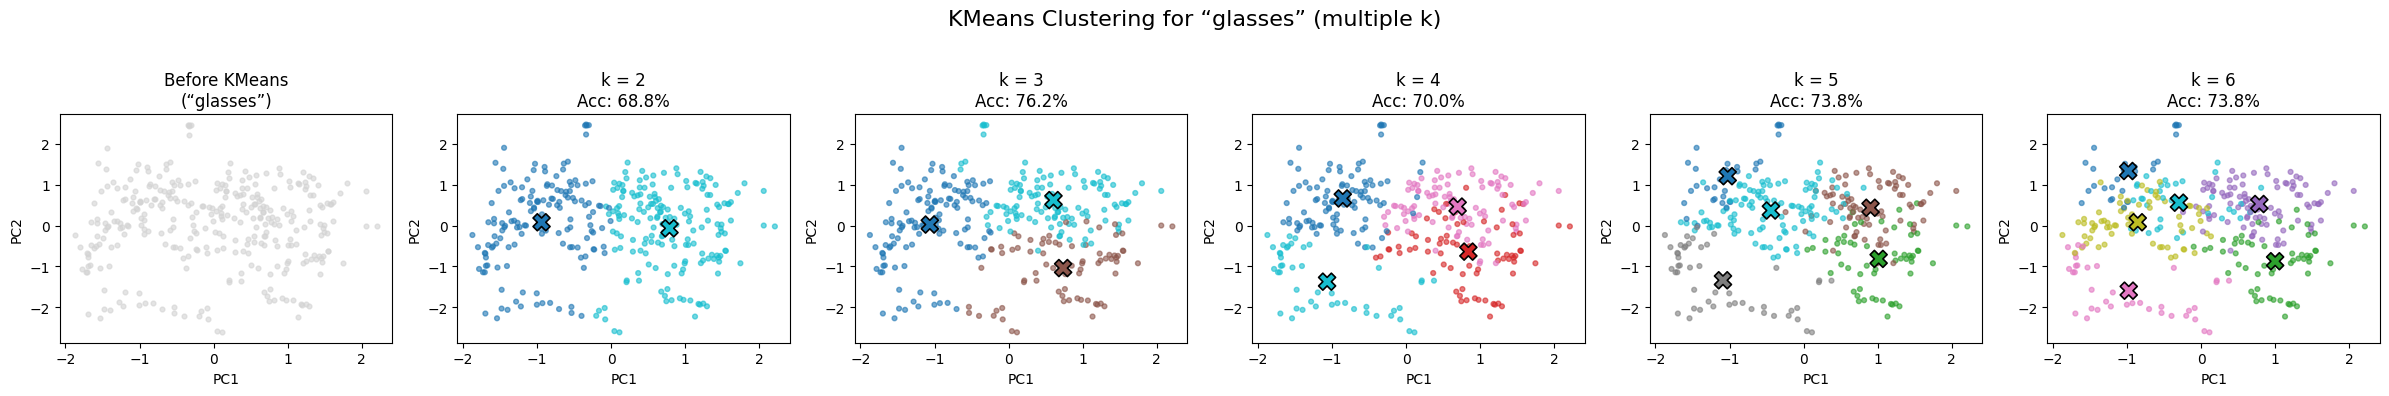

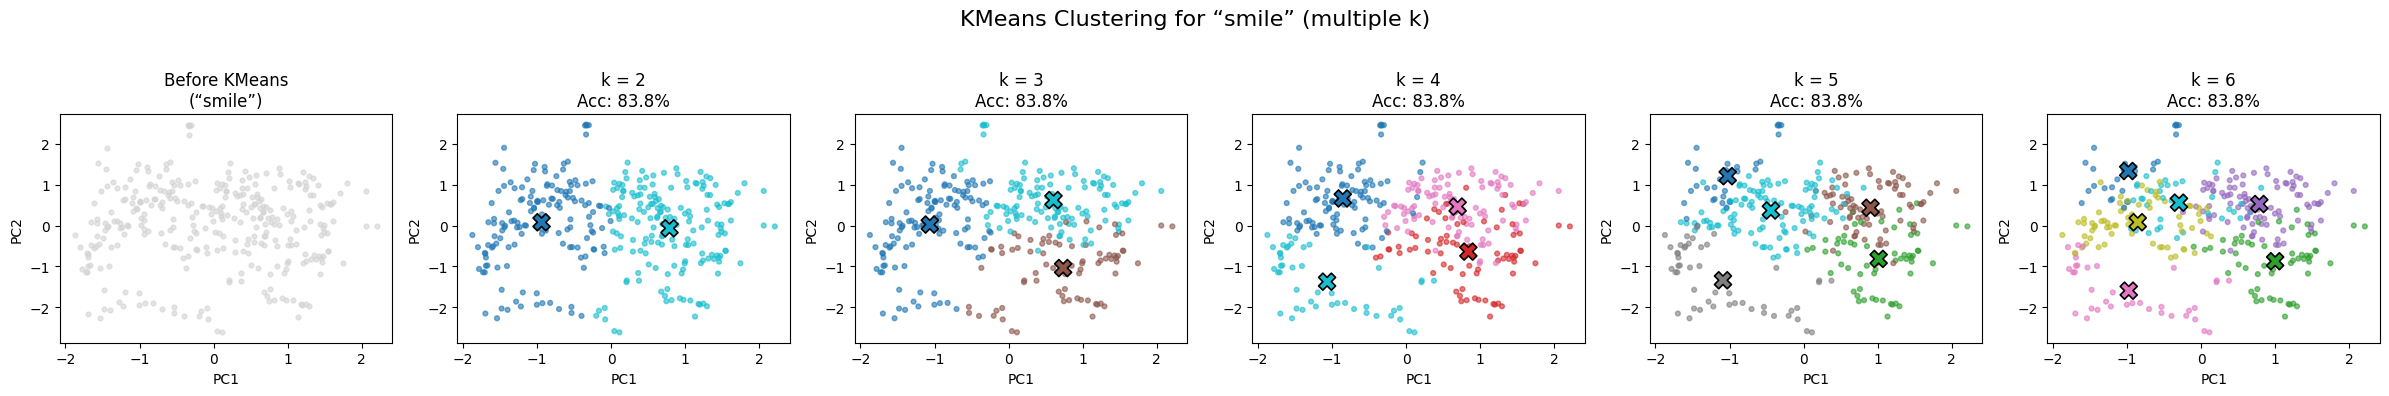

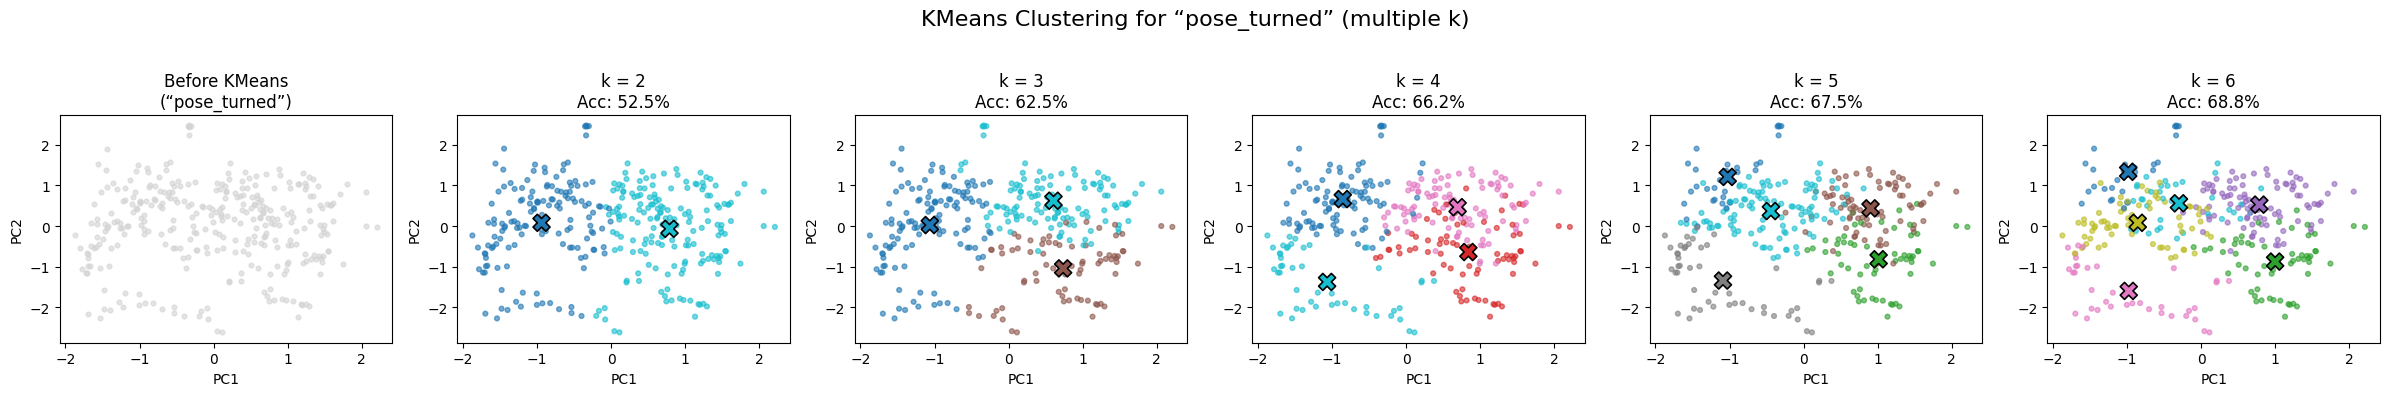


k-means accuracies   –  multiple k on 80/20 split

gender      :  k=2: 90.0% | k=3: 90.0% | k=4: 90.0% | k=5: 90.0% | k=6: 90.0%
hair_long   :  k=2: 67.5% | k=3: 67.5% | k=4: 71.2% | k=5: 70.0% | k=6: 71.2%
facial_hair :  k=2: 77.5% | k=3: 77.5% | k=4: 77.5% | k=5: 77.5% | k=6: 77.5%
glasses     :  k=2: 68.8% | k=3: 76.2% | k=4: 70.0% | k=5: 73.8% | k=6: 73.8%
smile       :  k=2: 83.8% | k=3: 83.8% | k=4: 83.8% | k=5: 83.8% | k=6: 83.8%
pose_turned :  k=2: 52.5% | k=3: 62.5% | k=4: 66.2% | k=5: 67.5% | k=6: 68.8%


In [ ]:
# k-MEANS with multiple k’s: before + after for each k
# ---------------------------------------------------
!pip install -q pandas tqdm scikit-learn opencv-python-headless matplotlib

import numpy as np
import pandas as pd
import cv2
import os
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import drive

# 1) Mount Drive
drive.mount('/content/drive')

# 2) Paths and labels
ROOT   = '/content/drive/MyDrive/faces_dataset'
CSV    = '/content/drive/MyDrive/split_manifest_intra.csv'
LABELS = ['gender', 'hair_long', 'facial_hair', 'glasses', 'smile', 'pose_turned']

# 3) Helpers
def full(p):
    return p if os.path.isabs(p) else os.path.join(ROOT, p)

def vec(p):
    img = cv2.imread(full(p), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Cannot load image: {full(p)}")
    return img.flatten().astype(np.float32) / 255.0

# 4) Load data & flatten
df         = pd.read_csv(CSV)
X          = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train_mask = df.split == 'train'
test_mask  = df.split == 'eval'

# 5) Precompute 2D projection for VIS once (on the TRAINING set)
pca_vis  = PCA(n_components=2, whiten=True, random_state=0)
X2_train = pca_vis.fit_transform(X[train_mask])

# 6) Define your k values
K_LIST = [2, 3, 4, 5, 6]

results = {lab: {} for lab in LABELS}

for lab in LABELS:
    y = df[lab].values.astype(int)

    # Prepare a grid of subplots: 1 row, 1 (before) + len(K_LIST) (after) columns
    ncols = 1 + len(K_LIST)
    fig, axes = plt.subplots(1, ncols, figsize=(4*ncols, 4))

    # Plot the “Before” column once
    axes[0].scatter(
        X2_train[:,0], X2_train[:,1],
        c='lightgray', s=12, alpha=0.6
    )
    axes[0].set_title(f'Before KMeans\n(“{lab}”)')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')

    # For each k in your list, fit & plot
    for i, k in enumerate(K_LIST, start=1):
        km = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X[train_mask])
        clust_train = km.labels_

        # Map to class via majority vote for accuracy
        train_labels = y[train_mask]
        mapping = {}
        for c in range(k):
            mask = clust_train == c
            mapping[c] = int(train_labels[mask].mean() >= 0.5) if mask.any() else 0

        # Evaluate on test split
        test_clust = km.predict(X[test_mask])
        y_pred = np.vectorize(mapping.get)(test_clust)
        results[lab][k] = accuracy_score(y[test_mask], y_pred) * 100

        # Plot “After” for this k
        ax = axes[i]
        ax.scatter(
            X2_train[:,0], X2_train[:,1],
            c=clust_train, cmap='tab10', s=12, alpha=0.6
        )

        # project & overplot centroids
        cent2d = pca_vis.transform(km.cluster_centers_)
        ax.scatter(
            cent2d[:,0], cent2d[:,1],
            marker='X', s=150, edgecolor='k', linewidth=1.2,
            c=list(range(k)), cmap='tab10'
        )

        ax.set_title(f'k = {k}\nAcc: {results[lab][k]:.1f}%')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')

    plt.suptitle(f'KMeans Clustering for “{lab}” (multiple k)', fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

# 7) Print a summary table of accuracies
print('\nk-means accuracies   –  multiple k on 80/20 split\n')
for lab in LABELS:
    row = ' | '.join(f'k={k}:{results[lab][k]:5.1f}%' for k in K_LIST)
    print(f'{lab:12s}:  {row}')


In [ ]:
# Canonical Correlation Analysis (CCA) classifier for every attribute
!pip install -q pandas tqdm scikit-learn

import numpy as np, pandas as pd, cv2, os
from tqdm.auto import tqdm
from sklearn.cross_decomposition import CCA
from sklearn.metrics import accuracy_score
from google.colab import drive

drive.mount('/content/drive')

ROOT = '/content/drive/MyDrive/faces_dataset'
CSV  = '/content/drive/MyDrive/split_manifest.csv'

LABELS = ['gender','hair_long','facial_hair',
          'glasses','smile','pose_turned']

# helper: read image as vector
def vec(p):
    img = cv2.imread(p if p.startswith('/') else f'{ROOT}/{p}',
                     cv2.IMREAD_GRAYSCALE)
    if img is None: raise FileNotFoundError(p)
    return img.flatten().astype(np.float32)/255.0

df  = pd.read_csv(CSV)
X   = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train, test = df.split=='train', df.split=='eval'

results = {}
for lab in LABELS:
    y        = df[lab].values.astype(int)
    Y_onehot = np.column_stack([1-y, y])          # shape (N,2)

    cca = CCA(n_components=1, max_iter=500, tol=1e-6)
    cca.fit(X[train], Y_onehot[train])

    u_train = cca.transform(X[train]).ravel()     # 1-D projections
    u_test  = cca.transform(X[test ]).ravel()

    c0 = u_train[y[train]==0].mean()
    c1 = u_train[y[train]==1].mean()

    y_pred = np.where(np.abs(u_test-c0) < np.abs(u_test-c1), 0, 1)
    results[lab] = accuracy_score(y[test], y_pred)*100

print('\nCCA accuracies  ')
for k,v in results.items():
    print(f'{k:12s}: {v:6.2f} %')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


vecs:   0%|          | 0/400 [00:00<?, ?it/s]


CCA accuracies  
gender      :  75.00 %
hair_long   :  66.25 %
facial_hair :  73.75 %
glasses     :  65.00 %
smile       :  77.50 %
pose_turned :  86.25 %


In [ ]:
# Canonical Correlation Analysis (CCA) classifier for every attribute
!pip install -q pandas tqdm scikit-learn

import numpy as np, pandas as pd, cv2, os
from tqdm.auto import tqdm
from sklearn.cross_decomposition import CCA
from sklearn.metrics import accuracy_score
from google.colab import drive

drive.mount('/content/drive')

ROOT = '/content/drive/MyDrive/faces_dataset'
CSV  = '/content/drive/MyDrive/split_manifest_intra.csv'     # 80/20 same-subject


LABELS = ['gender','hair_long','facial_hair',
          'glasses','smile','pose_turned']

# helper: read image as vector
def vec(p):
    img = cv2.imread(p if p.startswith('/') else f'{ROOT}/{p}',
                     cv2.IMREAD_GRAYSCALE)
    if img is None: raise FileNotFoundError(p)
    return img.flatten().astype(np.float32)/255.0

df  = pd.read_csv(CSV)
X   = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train, test = df.split=='train', df.split=='eval'

results = {}
for lab in LABELS:
    y        = df[lab].values.astype(int)
    Y_onehot = np.column_stack([1-y, y])          # shape (N,2)

    cca = CCA(n_components=1, max_iter=500, tol=1e-6)
    cca.fit(X[train], Y_onehot[train])

    u_train = cca.transform(X[train]).ravel()     # 1-D projections
    u_test  = cca.transform(X[test ]).ravel()

    c0 = u_train[y[train]==0].mean()
    c1 = u_train[y[train]==1].mean()

    y_pred = np.where(np.abs(u_test-c0) < np.abs(u_test-c1), 0, 1)
    results[lab] = accuracy_score(y[test], y_pred)*100

print('\nCCA accuracies  –  80/20 same-subject split')
for k,v in results.items():
    print(f'{k:12s}: {v:6.2f} %')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


vecs:   0%|          | 0/400 [00:00<?, ?it/s]


CCA accuracies  –  80/20 same-subject split
gender      :  97.50 %
hair_long   :  93.75 %
facial_hair :  92.50 %
glasses     :  93.75 %
smile       :  81.25 %
pose_turned :  90.00 %


Mounted at /content/drive


vecs:   0%|          | 0/400 [00:00<?, ?it/s]


►► GENDER


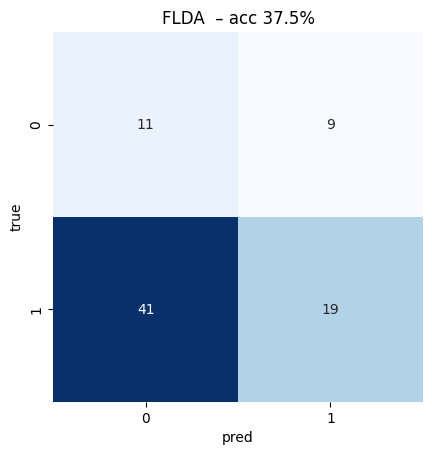

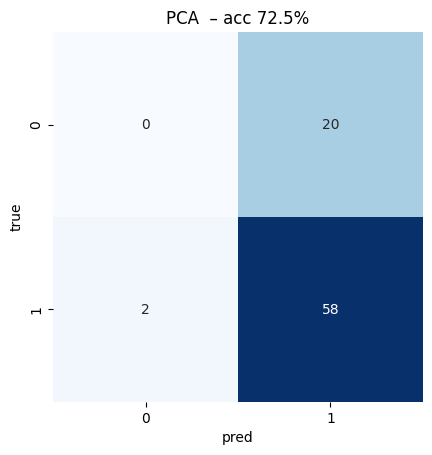

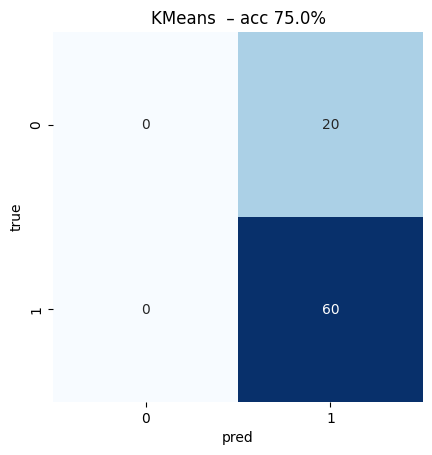

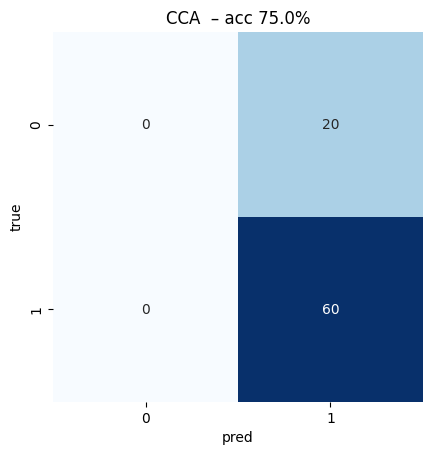


►► HAIR_LONG


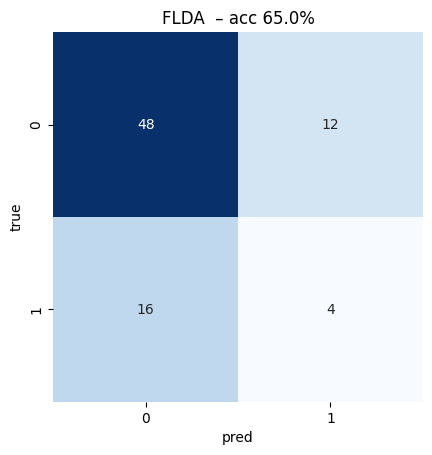

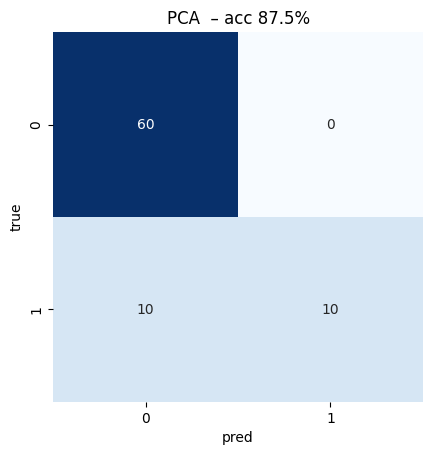

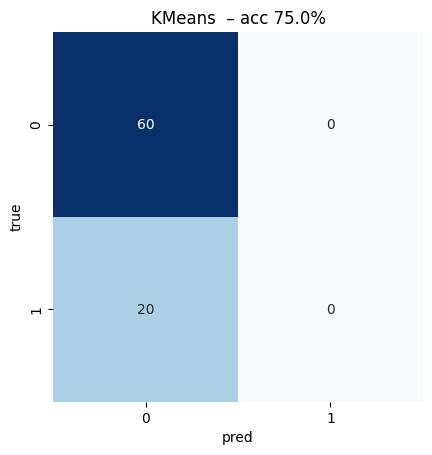

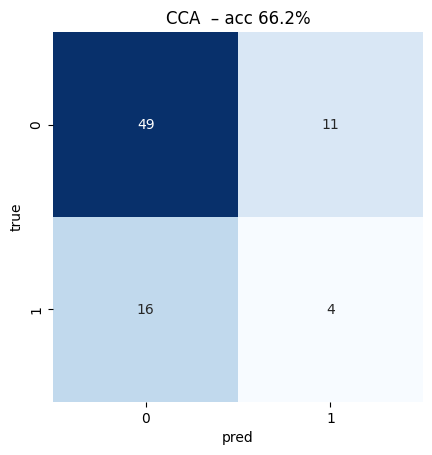


►► FACIAL_HAIR


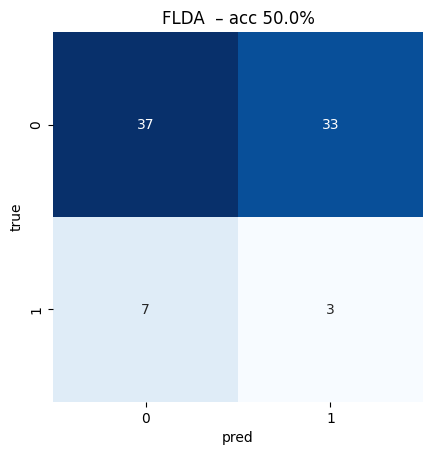

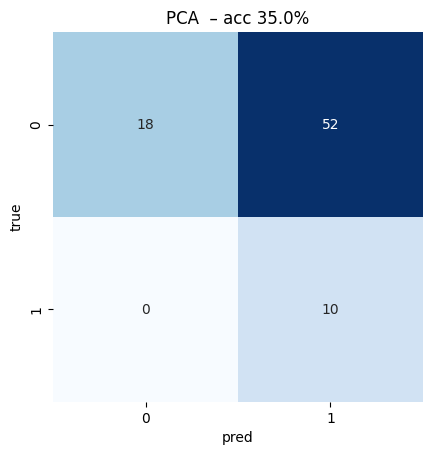

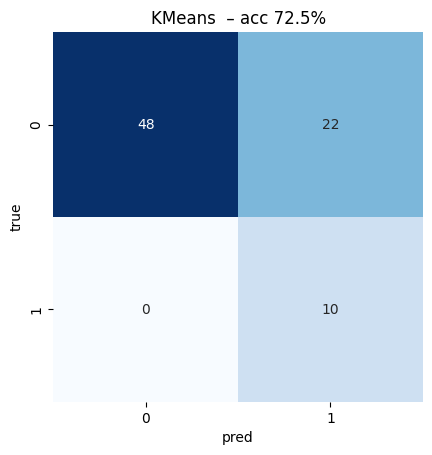

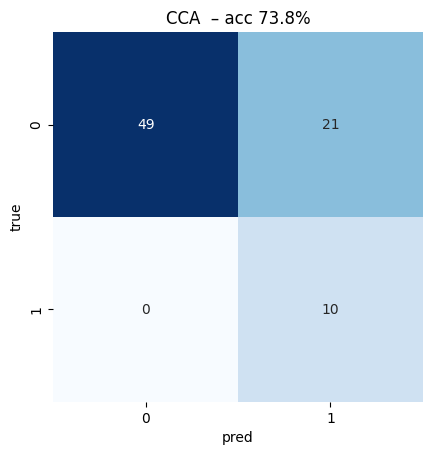


►► GLASSES


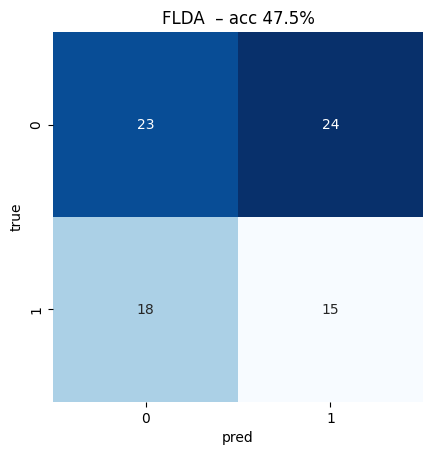

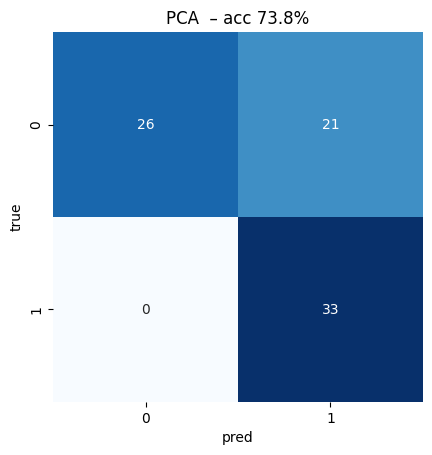

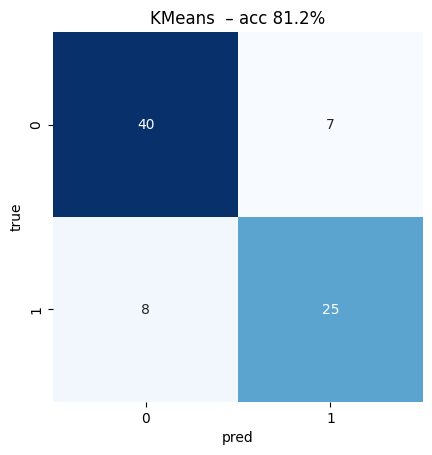

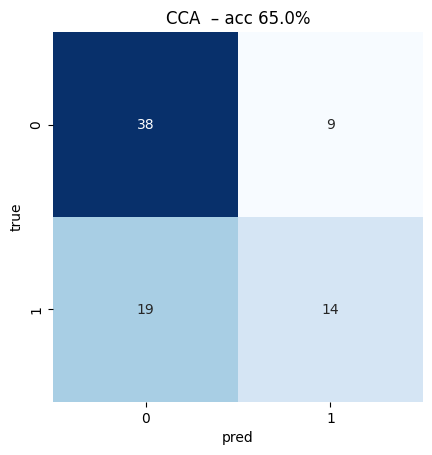


►► SMILE


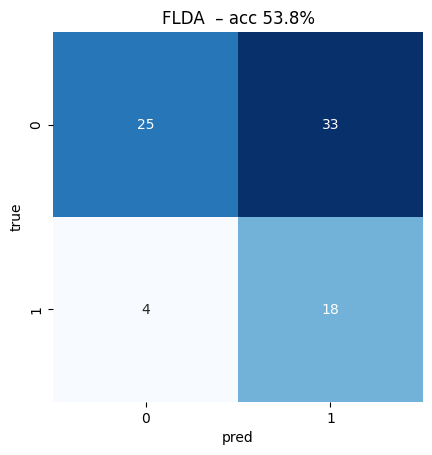

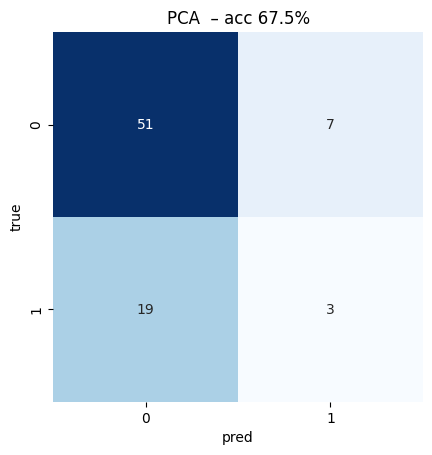

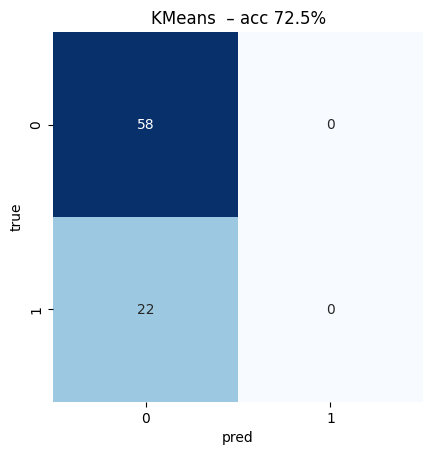

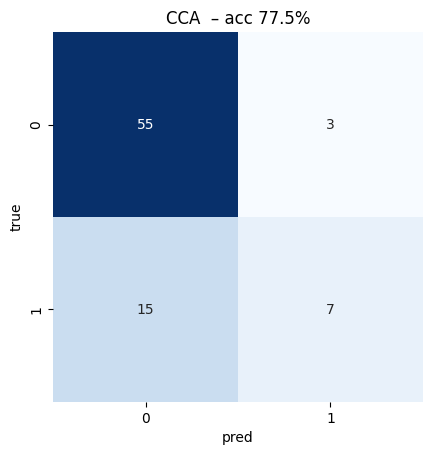


►► POSE_TURNED


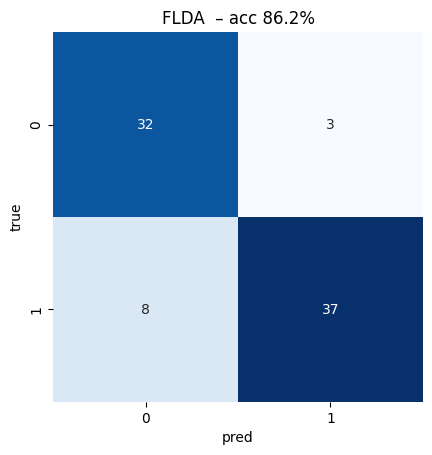

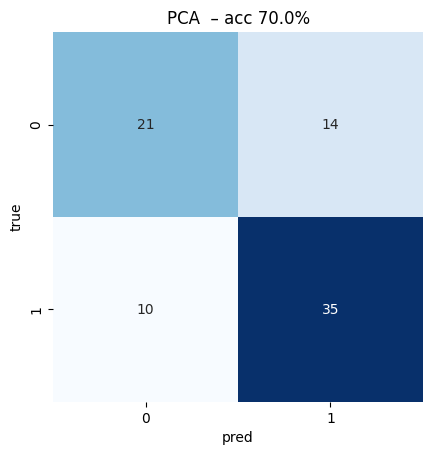

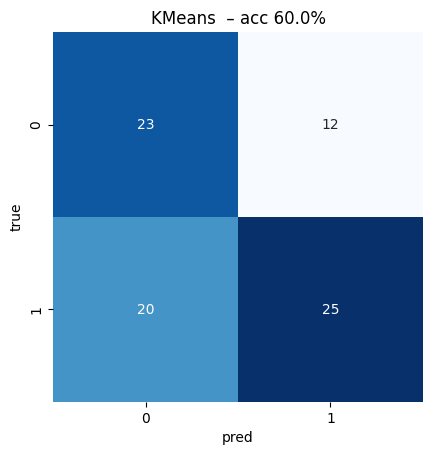

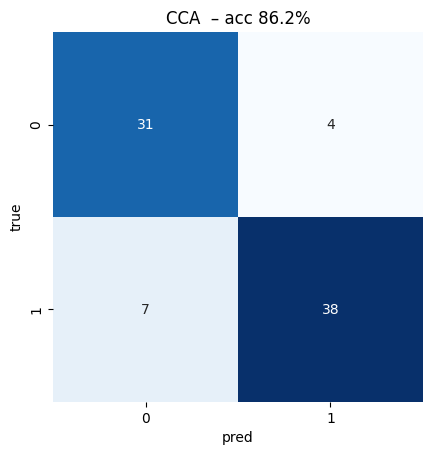

In [ ]:
# COMPLETE EVALUATION + CONFUSION MATRICES  (80 / 20 same-subject split)
!pip install -q scikit-learn seaborn

import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.cross_decomposition import CCA
from google.colab import drive, output
from tqdm.auto import tqdm
import cv2, os

drive.mount('/content/drive')

ROOT = '/content/drive/MyDrive/faces_dataset'
CSV  = '/content/drive/MyDrive/split_manifest.csv'
LABELS = ['gender','hair_long','facial_hair','glasses','smile','pose_turned']

def vec(p):                       # helper
    img = cv2.imread(p if p.startswith('/') else f'{ROOT}/{p}',
                     cv2.IMREAD_GRAYSCALE)
    return img.flatten().astype(np.float32)/255.0

df   = pd.read_csv(CSV)
X    = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train, test = df.split=='train', df.split=='eval'

# pre-compute PCA space once (95 % var)
pca = PCA(n_components=0.95, svd_solver='full').fit(X[train])
Xp_train, Xp_test = pca.transform(X[train]), pca.transform(X[test])

# place to collect results
all_preds, all_true = {}, {}

for lab in LABELS:
    y = df[lab].values.astype(int)
    all_true[lab] = y[test]

    # 1 ───────── FLDA
    mu0 = X[train & (y==0)].mean(axis=0, keepdims=True)
    mu1 = X[train & (y==1)].mean(axis=0, keepdims=True)
    XC0 = X[train & (y==0)] - mu0
    XC1 = X[train & (y==1)] - mu1
    Sintra = XC0.T @ XC0 + XC1.T @ XC1 + 1e-4*np.eye(X.shape[1])
    w = np.linalg.inv(Sintra) @ (mu1-mu0).T
    b = w.flatten() @ ((mu1+mu0)/2).flatten()
    fl_pred = ((X[test] @ w).flatten() - b > 0).astype(int)

    # 2 ───────── PCA (nearest mean)
    m0 = Xp_train[y[train]==0].mean(axis=0)
    m1 = Xp_train[y[train]==1].mean(axis=0)
    pca_pred = (np.linalg.norm(Xp_test-m1,axis=1) <
                np.linalg.norm(Xp_test-m0,axis=1)).astype(int)

    # 3 ───────── k-means  (K=best from previous grid)
    k = 4                                        # put your chosen K per label
    km = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X[train])
    map_ = {c:int(y[train][km.labels_==c].mean()>=.5) for c in range(k)}
    km_pred = np.vectorize(map_.get)(km.predict(X[test]))

    # 4 ───────── CCA
    Yhot = np.column_stack([1-y, y])
    cca = CCA(n_components=1, max_iter=500).fit(X[train], Yhot[train])
    u_tr = cca.transform(X[train]).ravel()
    u_te = cca.transform(X[test]).ravel()
    c0,c1 = u_tr[y[train]==0].mean(), u_tr[y[train]==1].mean()
    cca_pred = (np.abs(u_te-c1) < np.abs(u_te-c0)).astype(int)

    all_preds[lab] = dict(FLDA=fl_pred, PCA=pca_pred,
                          KMeans=km_pred, CCA=cca_pred)

# ────────── visualise confusion matrices ──────────
for lab in LABELS:
    print(f'\n►► {lab.upper()}')
    for meth,pred in all_preds[lab].items():
        cm = confusion_matrix(all_true[lab], pred)
        acc = accuracy_score(all_true[lab], pred)*100
        ax  = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                          cbar=False, square=True,
                          xticklabels=['0','1'], yticklabels=['0','1'])
        ax.set_title(f'{meth}  – acc {acc:4.1f}%')
        ax.set_xlabel('pred'); ax.set_ylabel('true')
        plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


vecs:   0%|          | 0/400 [00:00<?, ?it/s]


►► GENDER


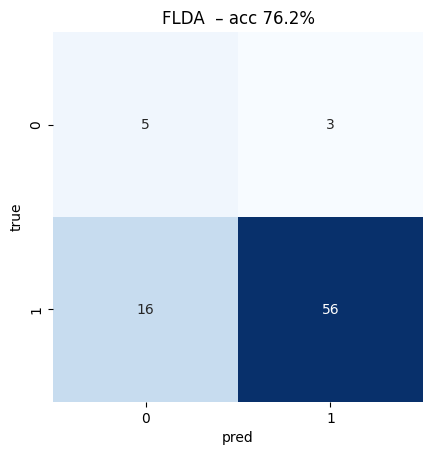

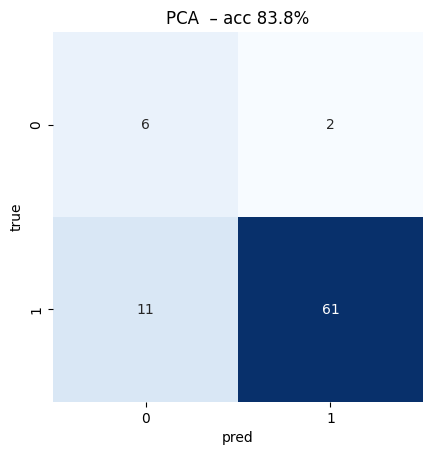

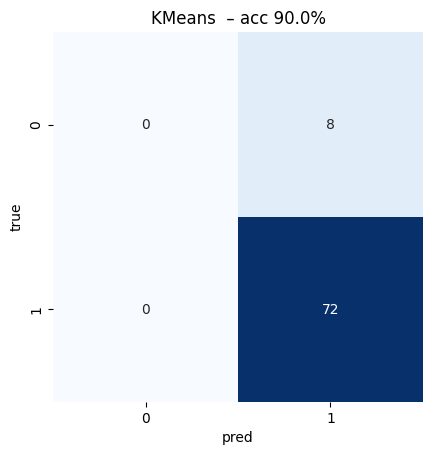

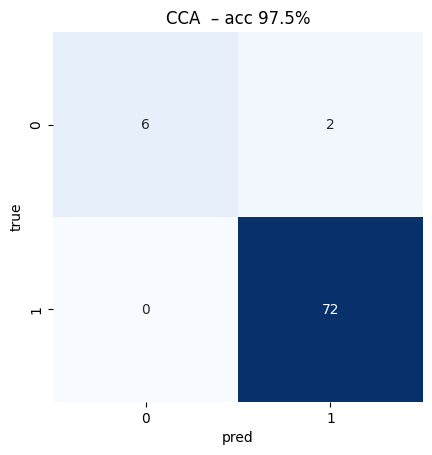


►► HAIR_LONG


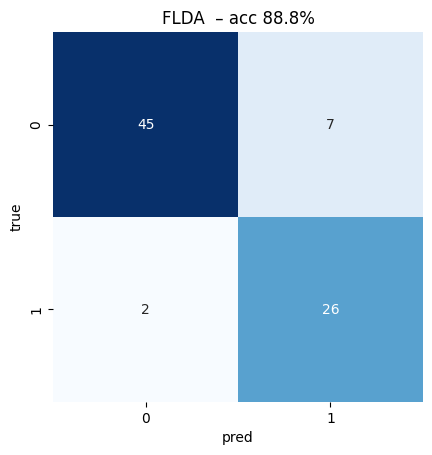

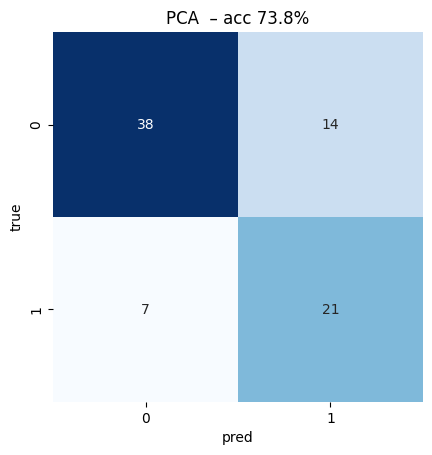

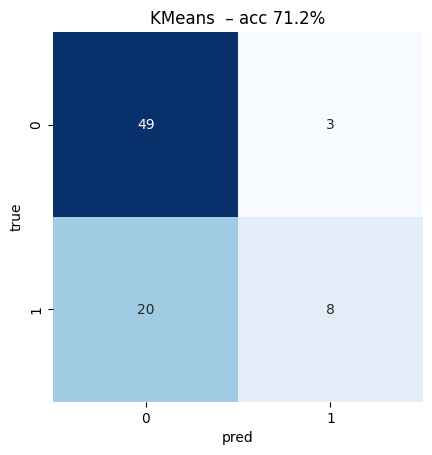

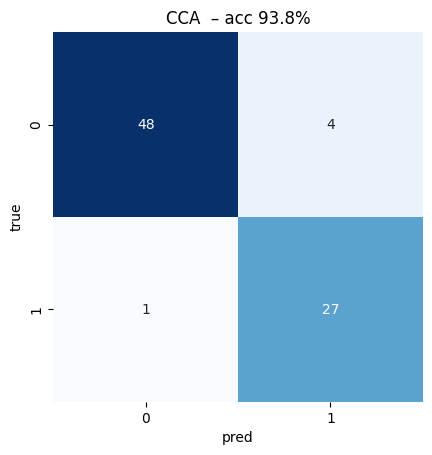


►► FACIAL_HAIR


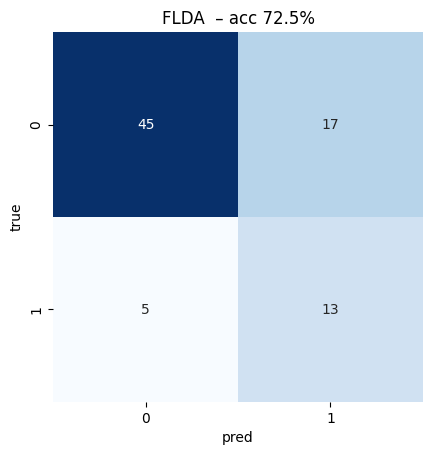

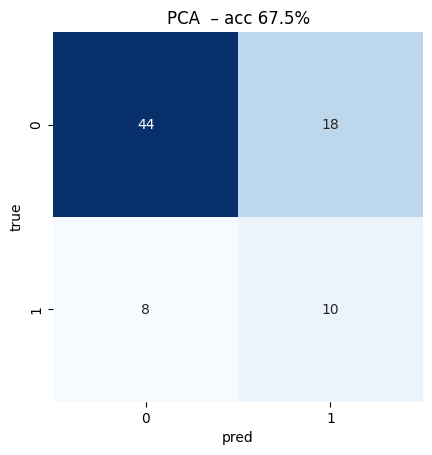

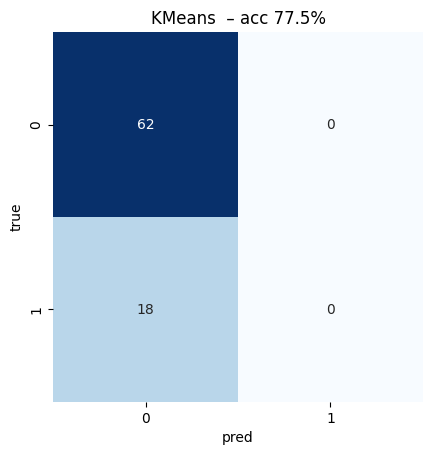

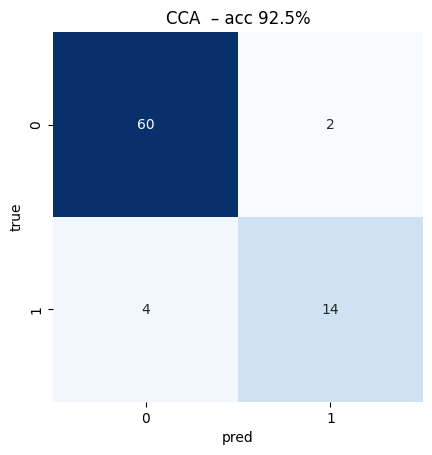


►► GLASSES


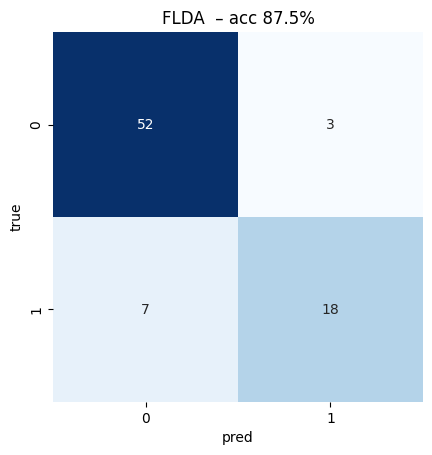

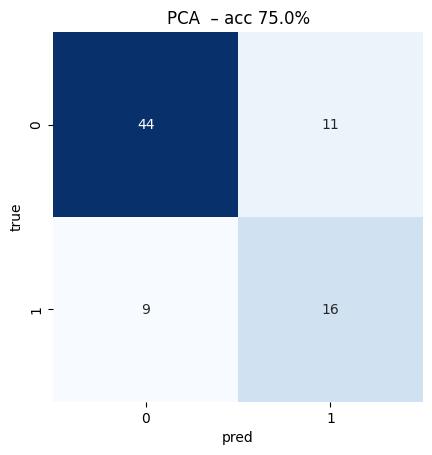

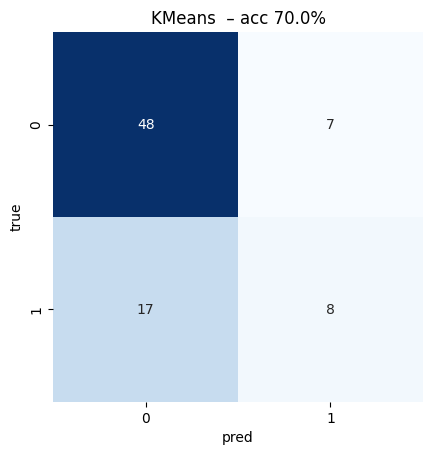

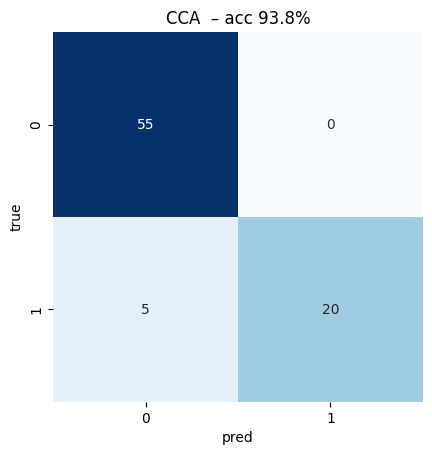


►► SMILE


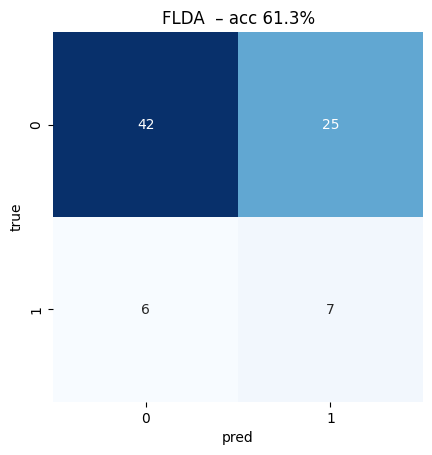

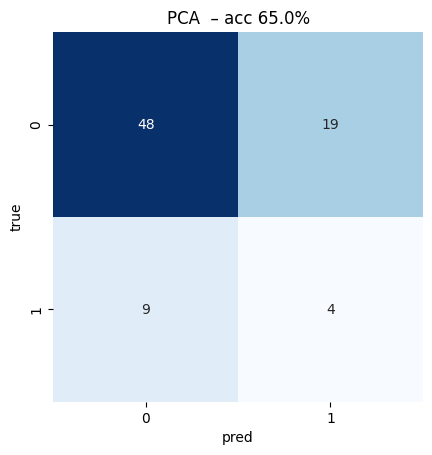

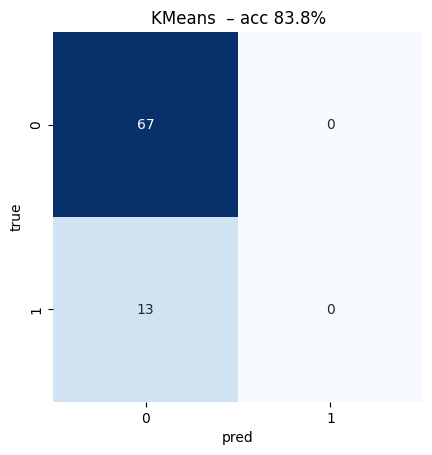

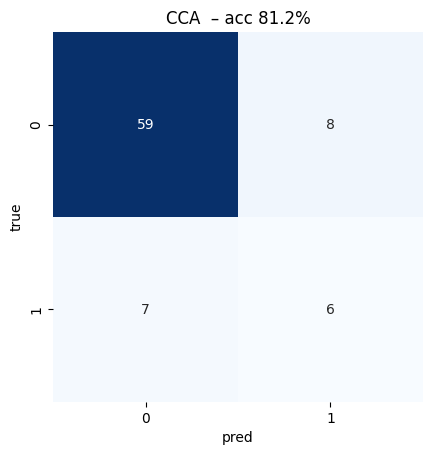


►► POSE_TURNED


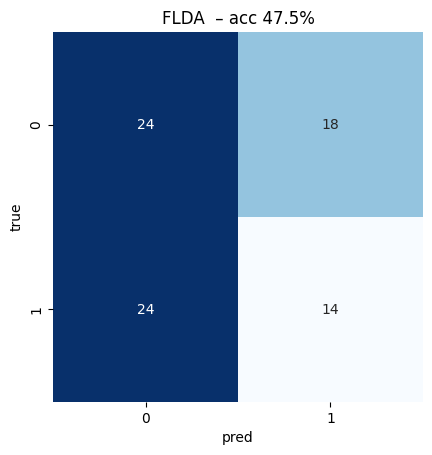

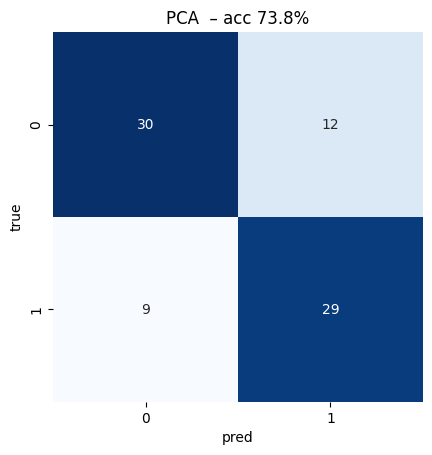

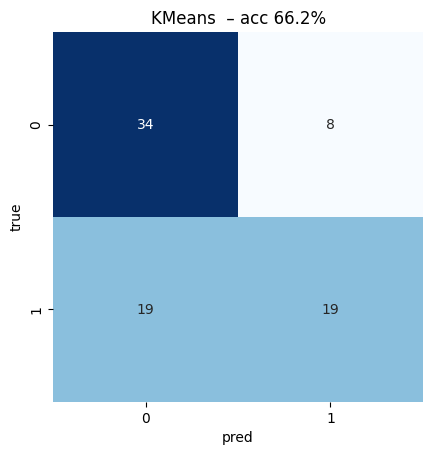

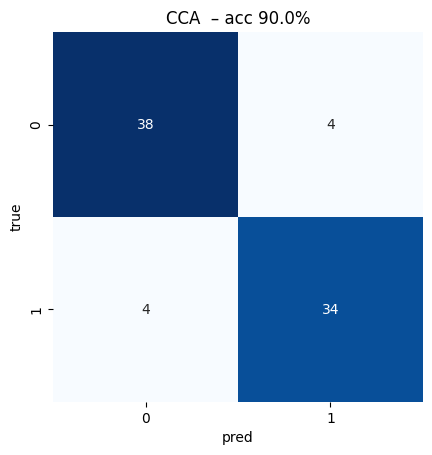

In [ ]:
# COMPLETE EVALUATION + CONFUSION MATRICES  (80 / 20 same-subject split)
!pip install -q scikit-learn seaborn

import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.cross_decomposition import CCA
from google.colab import drive, output
from tqdm.auto import tqdm
import cv2, os

drive.mount('/content/drive')

ROOT = '/content/drive/MyDrive/faces_dataset'
CSV  = '/content/drive/MyDrive/split_manifest_intra.csv'   # or cross-subject manifest
LABELS = ['gender','hair_long','facial_hair','glasses','smile','pose_turned']

def vec(p):                       # helper
    img = cv2.imread(p if p.startswith('/') else f'{ROOT}/{p}',
                     cv2.IMREAD_GRAYSCALE)
    return img.flatten().astype(np.float32)/255.0

df   = pd.read_csv(CSV)
X    = np.vstack([vec(p) for p in tqdm(df.image, desc='vecs')])
train, test = df.split=='train', df.split=='eval'

# pre-compute PCA space once (95 % var)
pca = PCA(n_components=0.95, svd_solver='full').fit(X[train])
Xp_train, Xp_test = pca.transform(X[train]), pca.transform(X[test])

# place to collect results
all_preds, all_true = {}, {}

for lab in LABELS:
    y = df[lab].values.astype(int)
    all_true[lab] = y[test]

    # 1 ───────── FLDA
    mu0 = X[train & (y==0)].mean(axis=0, keepdims=True)
    mu1 = X[train & (y==1)].mean(axis=0, keepdims=True)
    XC0 = X[train & (y==0)] - mu0
    XC1 = X[train & (y==1)] - mu1
    Sintra = XC0.T @ XC0 + XC1.T @ XC1 + 1e-4*np.eye(X.shape[1])
    w = np.linalg.inv(Sintra) @ (mu1-mu0).T
    b = w.flatten() @ ((mu1+mu0)/2).flatten()
    fl_pred = ((X[test] @ w).flatten() - b > 0).astype(int)

    # 2 ───────── PCA (nearest mean)
    m0 = Xp_train[y[train]==0].mean(axis=0)
    m1 = Xp_train[y[train]==1].mean(axis=0)
    pca_pred = (np.linalg.norm(Xp_test-m1,axis=1) <
                np.linalg.norm(Xp_test-m0,axis=1)).astype(int)

    # 3 ───────── k-means  (K=best from previous grid)
    k = 4                                        # put your chosen K per label
    km = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X[train])
    map_ = {c:int(y[train][km.labels_==c].mean()>=.5) for c in range(k)}
    km_pred = np.vectorize(map_.get)(km.predict(X[test]))

    # 4 ───────── CCA
    Yhot = np.column_stack([1-y, y])
    cca = CCA(n_components=1, max_iter=500).fit(X[train], Yhot[train])
    u_tr = cca.transform(X[train]).ravel()
    u_te = cca.transform(X[test]).ravel()
    c0,c1 = u_tr[y[train]==0].mean(), u_tr[y[train]==1].mean()
    cca_pred = (np.abs(u_te-c1) < np.abs(u_te-c0)).astype(int)

    all_preds[lab] = dict(FLDA=fl_pred, PCA=pca_pred,
                          KMeans=km_pred, CCA=cca_pred)

# ────────── visualise confusion matrices ──────────
for lab in LABELS:
    print(f'\n►► {lab.upper()}')
    for meth,pred in all_preds[lab].items():
        cm = confusion_matrix(all_true[lab], pred)
        acc = accuracy_score(all_true[lab], pred)*100
        ax  = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                          cbar=False, square=True,
                          xticklabels=['0','1'], yticklabels=['0','1'])
        ax.set_title(f'{meth}  – acc {acc:4.1f}%')
        ax.set_xlabel('pred'); ax.set_ylabel('true')
        plt.show()
